In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
pd.options.display.max_columns=None
plt.rcParams['figure.figsize']=[15,8]

In [2]:
df = pd.read_csv('loan.csv')
df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  11-Dec   Fully Paid   
1           RENT     30000.0     Source Verified  11-Dec  Charged Off   
2           RENT     12252.0        Not Verified  11-Dec   Fully Paid   
3           RENT     49200.0     Source Verified  11-Dec   Fully Paid   
4           RENT     80000.0     Source Verified  11-Dec      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65            0   
1                  bike    309xx         GA   1.00            0   
2  real estate business    606xx         IL   8.72            0   
3              personel    917xx         CA  20.00            0   
4              Personal    972xx         OR  17.94            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85               1                     NaN   
1           Apr-99               5                     NaN   
2            1-Nov               2                     NaN   
3           Feb-96               1                    35.0   
4           Jan-96               0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN         3        0      13648     83.70%          9   
1                     NaN         3        0       1687      9.40%          4   
2                     NaN         2        0       2956     98.50%         10   
3                     NaN        10        0       5598        21%         37   
4                     NaN        15        0      27783     53.90%         38   

  initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0                   f       0.00           0.00   5863.155187   
1                   f       0.00           0.00   1008.710000   
2                   f       0.00           0.00   3005.666844   
3                   f       0.00           0.00  12231.890000   
4                   f     524.06         524.06   3513.330000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5833.84          5000.00         863.16     

In [3]:
df.shape

(39717, 111)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
df.describe()

id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%        8975.000000    280.220000  5.900000e+04     13.400000   
75%       14400.000000    430.780000  8.230000e+04     18.600000   
max       35000.000000   1305.190000  6.000000e+06     29.990000   

        delinq_2yrs  inq_last_6mths  mths_since_last_delinq  \
count  39717.000000    39717.000000            14035.000000   
mean       0.146512        0.869200               35.900962   
std        0.491812        1.070219               22.020060   
min        0.000000        0.000000                0.000000   
25%        0.000000        0.000000               18.000000   
50%        0.000000        1.000000               34.000000   
75%        0.000000        1.000000               52.000000   
max       11.000000        8.000000              120.000000   

       mths_since_last_record      open_acc       pub_rec      revol_bal  \
count             2786.000000  39717.000000  39717.000000   39717.000000   
mean                69.698134      9.294408      0.055065   13382.528086   
std                 43.822529      4.400282      0.237200   15885.016641   
min                  0.000000      2.000000      0.000000       0.000000   
25%                 22.000000      6.000000      0.000000    3703.000000   
50%                 90.000000      9.000000      0.000000    8850.000000   
75%                104.000000     12.000000      0.000000   17058.000000   
max                129.000000     44.000000      4.000000  149588.000000   

          total_acc     out_prncp  out_prncp_inv   total_pymnt  \
count  39717.000000  39717.000000   39717.000000  39717.000000   
mean      22.088828     51.227887      50.989768  12153.596544   
std       11.401709    375.172839     373.824457   9042.040766   
min        2.000000      0.000000       0.000000      0.000000   
25%       13.000000      0.000000       0.000000   5576.930000   
50%       20.000000      0.000000       0.000000   9899.640319   
75%       29.000000      0.000000       0.000000  16534.433040   
max       90.000000   6311.470000    6307.370000  58563.679930   

       total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
count     39717.000000     39717.000000   39717.000000        39717.000000   
mean      11567.149118      9793.348813    2263.663172            1.363015   
std        8942.672613      7065.522127    2608.111964            7.289979   
min           0.000000         0.000000       0.000000            0.000000   
25%        5112.310000      4600.000000     662.180000            0.000000   
50%        9287.150000      8000.000000    1348.910000            0.000000   
75%       15798.810000     13653.260000    2833.400000            0.000000   
max       58563.680000     35000.020000   23563.680000          180.200000   

         recoveries  collection_recovery_fee  last_pymnt_amnt  \
count  39717.000000             39717.000000     39717.000000   
mean      95.221624                12.406112      2678.826162   
std      688.744771               148.671593      4447.136012   
min    

In [6]:
df.describe(include='O')

term int_rate  grade sub_grade emp_title emp_length  \
count        39717    39717  39717     39717     37258      38642   
unique           2      371      7        35     28820         11   
top      36 months   10.99%      B        B3   US Army  10+ years   
freq         29096      956  12020      2917       134       8879   

       home_ownership verification_status issue_d loan_status pymnt_plan  \
count           39717               39717   39717       39717      39717   
unique              5                   3      55           3          1   
top              RENT        Not Verified  11-Dec  Fully Paid          n   
freq            18899               16921    2260       32950      39717   

                                                      url   desc  \
count                                               39717  26777   
unique                                              39717  26527   
top     https://lendingclub.com/browse/loanDetail.acti...          
freq                                                    1    210   

                   purpose               title zip_code addr_state  \
count                39717               39706    39717      39717   
unique                  14               19614      823         50   
top     debt_consolidation  Debt Consolidation    100xx         CA   
freq                 18641                2184      597       7099   

       earliest_cr_line revol_util initial_list_status last_pymnt_d  \
count             39717      39667               39717        39646   
unique              526       1089                   1          101   
top              Nov-98         0%                   f       16-May   
freq                370        977               39717         1256   

       next_pymnt_d last_credit_pull_d application_type  
count          1140              39715            39717  
unique            2                106                1  
top          16-Jun             16-May       INDIVIDUAL  
freq           1125              10308            39717

In [7]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [8]:
a = df.isnull().sum()/len(df)*100
b = a[a==100]

In [9]:
b.index

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

In [10]:
df = df.drop(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim',
       'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit','policy_code'],axis = 1)

In [11]:
df.isnull().sum()/len(df)*100

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [12]:
df = df.drop(['next_pymnt_d','mths_since_last_record','mths_since_last_delinq'],axis = 1)

In [13]:
df.isnull().sum()/len(df)*100

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [15]:
df.desc.nunique()

26527

In [16]:
df.drop('desc',axis=1,inplace=True)

In [17]:
df.dropna(inplace=True)

In [18]:
df.reset_index(drop=False)

index       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0          1  1077430    1314167       2500         2500          2500.00   
1          3  1076863    1277178      10000        10000         10000.00   
2          4  1075358    1311748       3000         3000          3000.00   
3          5  1075269    1311441       5000         5000          5000.00   
4          6  1069639    1304742       7000         7000          7000.00   
...      ...      ...        ...        ...          ...              ...   
36426  39433   200600     200597       7500         7500          1599.78   
36427  39475   186572     186568      12000        12000           725.00   
36428  39551   158706     158450      12375        12375          1000.00   
36429  39562   154154     151536       4800         4800          1100.00   
36430  39623   132892     132889       9000         9000           700.00   

             term int_rate  installment grade sub_grade  \
0       60 months   15.27%        59.83     C        C4   
1       36 months   13.49%       339.31     C        C1   
2       60 months   12.69%        67.79     B        B5   
3       36 months    7.90%       156.46     A        A4   
4       60 months   15.96%       170.08     C        C5   
...           ...      ...          ...   ...       ...   
36426   36 months    9.83%       241.41     B        B3   
36427   36 months    9.01%       381.66     B        B2   
36428   36 months   10.91%       404.62     C        C3   
36429   36 months   10.28%       155.52     C        C1   
36430   36 months   12.49%       301.04     D        D3   

                       emp_title emp_length home_ownership  annual_inc  \
0                          Ryder   < 1 year           RENT    30000.00   
1            AIR RESOURCES BOARD  10+ years           RENT    49200.00   
2       University Medical Group     1 year           RENT    80000.00   
3           Veolia Transportaton    3 years           RENT    36000.00   
4      Southern Star Photography    8 years           RENT    47004.00   
...                          ...        ...            ...         ...   
36426        UCLA Medical Center    7 years           RENT    96000.00   
36427      Bank of America Corp.    6 years       MORTGAGE   100671.39   
36428          Fullmoon Software    2 years           RENT    80000.00   
36429              E.E. Wine Inc     1 year           RENT    35000.00   
36430                    Maximus    8 years       MORTGAGE    39000.00   

      verification_status issue_d  loan_status pymnt_plan  \
0         Source Verified  11-Dec  Charged Off          n   
1         Source Verified  11-Dec   Fully Paid          n   
2         Source Verified  11-Dec      Current          n   
3         Source Verified  11-Dec   Fully Paid          n   
4            Not Verified  11-Dec   Fully Paid          n   
...                   ...     ...          ...        ...   
36426        Not Verified   8-Jan   Fully Paid          n   
36427        Not Verified   7-Dec   Fully Paid          n   
36428        Not Verified   7-Dec   Fully Paid          n   
36429        Not Verified   7-Nov   Fully Paid          n   
36430        Not Verified   7-Oct  Charged Off          n   

                                                     url             purpose  \
0      https://lendingclub.com/browse/loanDetail.acti...                 car   
1      https://lendingclub.com/browse/loanDetail.acti...               other   
2      https://lendingclub.com/browse/loanDetail.acti...               other   
3      https://lendingclub.com/browse/loanDetail.acti...             wedding   
4      https://lendingclub.com/browse/loanDetail.acti...  debt_consolidation   
...                                                  ...                 ...   
36426  https://lendingclub.com/browse/loanDetail.acti...         credit_card   
36427  https://lendingclub.com/browse/loanDetail.acti...         credit_card   
36428  https://lendingclub.com/

In [19]:
df.isnull().sum()/len(df)*100

id                            0.0
member_id                     0.0
loan_amnt                     0.0
funded_amnt                   0.0
funded_amnt_inv               0.0
term                          0.0
int_rate                      0.0
installment                   0.0
grade                         0.0
sub_grade                     0.0
emp_title                     0.0
emp_length                    0.0
home_ownership                0.0
annual_inc                    0.0
verification_status           0.0
issue_d                       0.0
loan_status                   0.0
pymnt_plan                    0.0
url                           0.0
purpose                       0.0
title                         0.0
zip_code                      0.0
addr_state                    0.0
dti                           0.0
delinq_2yrs                   0.0
earliest_cr_line              0.0
inq_last_6mths                0.0
open_acc                      0.0
pub_rec                       0.0
revol_bal     

In [20]:
df.shape

(36431, 52)

# Deleting column has 0 value 

In [21]:
df[df['tax_liens']==0.0]

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
1      1077430    1314167       2500         2500          2500.00   
3      1076863    1277178      10000        10000         10000.00   
4      1075358    1311748       3000         3000          3000.00   
5      1075269    1311441       5000         5000          5000.00   
6      1069639    1304742       7000         7000          7000.00   
...        ...        ...        ...          ...              ...   
39433   200600     200597       7500         7500          1599.78   
39475   186572     186568      12000        12000           725.00   
39551   158706     158450      12375        12375          1000.00   
39562   154154     151536       4800         4800          1100.00   
39623   132892     132889       9000         9000           700.00   

             term int_rate  installment grade sub_grade  \
1       60 months   15.27%        59.83     C        C4   
3       36 months   13.49%       339.31     C        C1   
4       60 months   12.69%        67.79     B        B5   
5       36 months    7.90%       156.46     A        A4   
6       60 months   15.96%       170.08     C        C5   
...           ...      ...          ...   ...       ...   
39433   36 months    9.83%       241.41     B        B3   
39475   36 months    9.01%       381.66     B        B2   
39551   36 months   10.91%       404.62     C        C3   
39562   36 months   10.28%       155.52     C        C1   
39623   36 months   12.49%       301.04     D        D3   

                       emp_title emp_length home_ownership  annual_inc  \
1                          Ryder   < 1 year           RENT    30000.00   
3            AIR RESOURCES BOARD  10+ years           RENT    49200.00   
4       University Medical Group     1 year           RENT    80000.00   
5           Veolia Transportaton    3 years           RENT    36000.00   
6      Southern Star Photography    8 years           RENT    47004.00   
...                          ...        ...            ...         ...   
39433        UCLA Medical Center    7 years           RENT    96000.00   
39475      Bank of America Corp.    6 years       MORTGAGE   100671.39   
39551          Fullmoon Software    2 years           RENT    80000.00   
39562              E.E. Wine Inc     1 year           RENT    35000.00   
39623                    Maximus    8 years       MORTGAGE    39000.00   

      verification_status issue_d  loan_status pymnt_plan  \
1         Source Verified  11-Dec  Charged Off          n   
3         Source Verified  11-Dec   Fully Paid          n   
4         Source Verified  11-Dec      Current          n   
5         Source Verified  11-Dec   Fully Paid          n   
6            Not Verified  11-Dec   Fully Paid          n   
...                   ...     ...          ...        ...   
39433        Not Verified   8-Jan   Fully Paid          n   
39475        Not Verified   7-Dec   Fully Paid          n   
39551        Not Verified   7-Dec   Fully Paid          n   
39562        Not Verified   7-Nov   Fully Paid          n   
39623        Not Verified   7-Oct  Charged Off          n   

                                                     url             purpose  \
1      https://lendingclub.com/browse/loanDetail.acti...                 car   
3      https://lendingclub.com/browse/loanDetail.acti...               other   
4      https://lendingclub.com/browse/loanDetail.acti...               other   
5      https://lendingclub.com/browse/loanDetail.acti...             wedding   
6      https://lendingclub.com/browse/loanDetail.acti...  debt_consolidation   
...                                                  ...                 ...   
39433  https://lendingclub.com/browse/loanDetail.acti...         credit_card   
39475  https://lendingclub.com/browse/loanDetail.acti...         credit_card   
39551  https://lendingclub.com/browse/loanDetail.acti...  debt_consolidation   
39562  https://lendingclub.com/browse/lo

In [22]:
df[df['tax_liens']==0.0].count()/len(df)*100

id                            100.0
member_id                     100.0
loan_amnt                     100.0
funded_amnt                   100.0
funded_amnt_inv               100.0
term                          100.0
int_rate                      100.0
installment                   100.0
grade                         100.0
sub_grade                     100.0
emp_title                     100.0
emp_length                    100.0
home_ownership                100.0
annual_inc                    100.0
verification_status           100.0
issue_d                       100.0
loan_status                   100.0
pymnt_plan                    100.0
url                           100.0
purpose                       100.0
title                         100.0
zip_code                      100.0
addr_state                    100.0
dti                           100.0
delinq_2yrs                   100.0
earliest_cr_line              100.0
inq_last_6mths                100.0
open_acc                    

In [23]:
df[df['pub_rec_bankruptcies']==0.0]

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
1      1077430    1314167       2500         2500      2500.000000   
3      1076863    1277178      10000        10000     10000.000000   
4      1075358    1311748       3000         3000      3000.000000   
5      1075269    1311441       5000         5000      5000.000000   
6      1069639    1304742       7000         7000      7000.000000   
...        ...        ...        ...          ...              ...   
38998   284207     284204       7500         7500      5387.500000   
38999   284136     284125      25000        25000      8933.600000   
39000   283826     283823      15000        15000      9019.298386   
39001   283707     211765      20000        20000      4031.290514   
39002   283106     264548      11000        11000      9375.000000   

             term int_rate  installment grade sub_grade  \
1       60 months   15.27%        59.83     C        C4   
3       36 months   13.49%       339.31     C        C1   
4       60 months   12.69%        67.79     B        B5   
5       36 months    7.90%       156.46     A        A4   
6       60 months   15.96%       170.08     C        C5   
...           ...      ...          ...   ...       ...   
38998   36 months   11.97%       249.00     C        C4   
38999   36 months    9.76%       803.87     B        B2   
39000   36 months    9.45%       480.15     B        B1   
39001   36 months   11.34%       658.00     C        C2   
39002   36 months   12.29%       366.89     C        C5   

                           emp_title emp_length home_ownership  annual_inc  \
1                              Ryder   < 1 year           RENT     30000.0   
3                AIR RESOURCES BOARD  10+ years           RENT     49200.0   
4           University Medical Group     1 year           RENT     80000.0   
5               Veolia Transportaton    3 years           RENT     36000.0   
6          Southern Star Photography    8 years           RENT     47004.0   
...                              ...        ...            ...         ...   
38998                SOCIAL SERVICES   < 1 year          OTHER     19200.0   
38999  Mayfield City School District    7 years       MORTGAGE     70000.0   
39000                        US Army  10+ years           RENT     62400.0   
39001                    Jada Beauty     1 year          OTHER     55000.0   
39002              Kaiser Permanente    4 years       MORTGAGE     36400.0   

      verification_status issue_d  loan_status pymnt_plan  \
1         Source Verified  11-Dec  Charged Off          n   
3         Source Verified  11-Dec   Fully Paid          n   
4         Source Verified  11-Dec      Current          n   
5         Source Verified  11-Dec   Fully Paid          n   
6            Not Verified  11-Dec   Fully Paid          n   
...                   ...     ...          ...        ...   
38998        Not Verified   8-Mar   Fully Paid          n   
38999        Not Verified   8-Mar   Fully Paid          n   
39000        Not Verified   8-Mar   Fully Paid          n   
39001        Not Verified   8-Mar  Charged Off          n   
39002        Not Verified   8-Mar   Fully Paid          n   

                                                     url             purpose  \
1      https://lendingclub.com/browse/loanDetail.acti...                 car   
3      https://lendingclub.com/browse/loanDetail.acti...               other   
4      https://lendingclub.com/browse/loanDetail.acti...               other   
5      https://lendingclub.com/browse/loanDetail.acti...             wedding   
6      https://lendingclub.com/browse/loanDetail.acti...  debt_consolidation   
...                                                  ...                 ...   
38998  https://lendingclub.com/browse/loanDetail.acti...  debt_consolidation   
38999  https://lendingclub.com/browse/loanDetail.acti...               other   
39000  https://lendingclub.com/browse/loanDetail.acti...  debt_consolida

In [24]:
df[df['pub_rec_bankruptcies']==0.0].count()/len(df)*100

id                            95.882627
member_id                     95.882627
loan_amnt                     95.882627
funded_amnt                   95.882627
funded_amnt_inv               95.882627
term                          95.882627
int_rate                      95.882627
installment                   95.882627
grade                         95.882627
sub_grade                     95.882627
emp_title                     95.882627
emp_length                    95.882627
home_ownership                95.882627
annual_inc                    95.882627
verification_status           95.882627
issue_d                       95.882627
loan_status                   95.882627
pymnt_plan                    95.882627
url                           95.882627
purpose                       95.882627
title                         95.882627
zip_code                      95.882627
addr_state                    95.882627
dti                           95.882627
delinq_2yrs                   95.882627


In [25]:
df[df['delinq_amnt']==0]

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
1      1077430    1314167       2500         2500          2500.00   
3      1076863    1277178      10000        10000         10000.00   
4      1075358    1311748       3000         3000          3000.00   
5      1075269    1311441       5000         5000          5000.00   
6      1069639    1304742       7000         7000          7000.00   
...        ...        ...        ...          ...              ...   
39433   200600     200597       7500         7500          1599.78   
39475   186572     186568      12000        12000           725.00   
39551   158706     158450      12375        12375          1000.00   
39562   154154     151536       4800         4800          1100.00   
39623   132892     132889       9000         9000           700.00   

             term int_rate  installment grade sub_grade  \
1       60 months   15.27%        59.83     C        C4   
3       36 months   13.49%       339.31     C        C1   
4       60 months   12.69%        67.79     B        B5   
5       36 months    7.90%       156.46     A        A4   
6       60 months   15.96%       170.08     C        C5   
...           ...      ...          ...   ...       ...   
39433   36 months    9.83%       241.41     B        B3   
39475   36 months    9.01%       381.66     B        B2   
39551   36 months   10.91%       404.62     C        C3   
39562   36 months   10.28%       155.52     C        C1   
39623   36 months   12.49%       301.04     D        D3   

                       emp_title emp_length home_ownership  annual_inc  \
1                          Ryder   < 1 year           RENT    30000.00   
3            AIR RESOURCES BOARD  10+ years           RENT    49200.00   
4       University Medical Group     1 year           RENT    80000.00   
5           Veolia Transportaton    3 years           RENT    36000.00   
6      Southern Star Photography    8 years           RENT    47004.00   
...                          ...        ...            ...         ...   
39433        UCLA Medical Center    7 years           RENT    96000.00   
39475      Bank of America Corp.    6 years       MORTGAGE   100671.39   
39551          Fullmoon Software    2 years           RENT    80000.00   
39562              E.E. Wine Inc     1 year           RENT    35000.00   
39623                    Maximus    8 years       MORTGAGE    39000.00   

      verification_status issue_d  loan_status pymnt_plan  \
1         Source Verified  11-Dec  Charged Off          n   
3         Source Verified  11-Dec   Fully Paid          n   
4         Source Verified  11-Dec      Current          n   
5         Source Verified  11-Dec   Fully Paid          n   
6            Not Verified  11-Dec   Fully Paid          n   
...                   ...     ...          ...        ...   
39433        Not Verified   8-Jan   Fully Paid          n   
39475        Not Verified   7-Dec   Fully Paid          n   
39551        Not Verified   7-Dec   Fully Paid          n   
39562        Not Verified   7-Nov   Fully Paid          n   
39623        Not Verified   7-Oct  Charged Off          n   

                                                     url             purpose  \
1      https://lendingclub.com/browse/loanDetail.acti...                 car   
3      https://lendingclub.com/browse/loanDetail.acti...               other   
4      https://lendingclub.com/browse/loanDetail.acti...               other   
5      https://lendingclub.com/browse/loanDetail.acti...             wedding   
6      https://lendingclub.com/browse/loanDetail.acti...  debt_consolidation   
...                                                  ...                 ...   
39433  https://lendingclub.com/browse/loanDetail.acti...         credit_card   
39475  https://lendingclub.com/browse/loanDetail.acti...         credit_card   
39551  https://lendingclub.com/browse/loanDetail.acti...  debt_consolidation   
39562  https://lendingclub.com/browse/lo

In [26]:
df[df['delinq_amnt']==0].count()/len(df)*100

id                            100.0
member_id                     100.0
loan_amnt                     100.0
funded_amnt                   100.0
funded_amnt_inv               100.0
term                          100.0
int_rate                      100.0
installment                   100.0
grade                         100.0
sub_grade                     100.0
emp_title                     100.0
emp_length                    100.0
home_ownership                100.0
annual_inc                    100.0
verification_status           100.0
issue_d                       100.0
loan_status                   100.0
pymnt_plan                    100.0
url                           100.0
purpose                       100.0
title                         100.0
zip_code                      100.0
addr_state                    100.0
dti                           100.0
delinq_2yrs                   100.0
earliest_cr_line              100.0
inq_last_6mths                100.0
open_acc                    

In [27]:
df[df['chargeoff_within_12_mths']==0.0]

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
1      1077430    1314167       2500         2500          2500.00   
3      1076863    1277178      10000        10000         10000.00   
4      1075358    1311748       3000         3000          3000.00   
5      1075269    1311441       5000         5000          5000.00   
6      1069639    1304742       7000         7000          7000.00   
...        ...        ...        ...          ...              ...   
39433   200600     200597       7500         7500          1599.78   
39475   186572     186568      12000        12000           725.00   
39551   158706     158450      12375        12375          1000.00   
39562   154154     151536       4800         4800          1100.00   
39623   132892     132889       9000         9000           700.00   

             term int_rate  installment grade sub_grade  \
1       60 months   15.27%        59.83     C        C4   
3       36 months   13.49%       339.31     C        C1   
4       60 months   12.69%        67.79     B        B5   
5       36 months    7.90%       156.46     A        A4   
6       60 months   15.96%       170.08     C        C5   
...           ...      ...          ...   ...       ...   
39433   36 months    9.83%       241.41     B        B3   
39475   36 months    9.01%       381.66     B        B2   
39551   36 months   10.91%       404.62     C        C3   
39562   36 months   10.28%       155.52     C        C1   
39623   36 months   12.49%       301.04     D        D3   

                       emp_title emp_length home_ownership  annual_inc  \
1                          Ryder   < 1 year           RENT    30000.00   
3            AIR RESOURCES BOARD  10+ years           RENT    49200.00   
4       University Medical Group     1 year           RENT    80000.00   
5           Veolia Transportaton    3 years           RENT    36000.00   
6      Southern Star Photography    8 years           RENT    47004.00   
...                          ...        ...            ...         ...   
39433        UCLA Medical Center    7 years           RENT    96000.00   
39475      Bank of America Corp.    6 years       MORTGAGE   100671.39   
39551          Fullmoon Software    2 years           RENT    80000.00   
39562              E.E. Wine Inc     1 year           RENT    35000.00   
39623                    Maximus    8 years       MORTGAGE    39000.00   

      verification_status issue_d  loan_status pymnt_plan  \
1         Source Verified  11-Dec  Charged Off          n   
3         Source Verified  11-Dec   Fully Paid          n   
4         Source Verified  11-Dec      Current          n   
5         Source Verified  11-Dec   Fully Paid          n   
6            Not Verified  11-Dec   Fully Paid          n   
...                   ...     ...          ...        ...   
39433        Not Verified   8-Jan   Fully Paid          n   
39475        Not Verified   7-Dec   Fully Paid          n   
39551        Not Verified   7-Dec   Fully Paid          n   
39562        Not Verified   7-Nov   Fully Paid          n   
39623        Not Verified   7-Oct  Charged Off          n   

                                                     url             purpose  \
1      https://lendingclub.com/browse/loanDetail.acti...                 car   
3      https://lendingclub.com/browse/loanDetail.acti...               other   
4      https://lendingclub.com/browse/loanDetail.acti...               other   
5      https://lendingclub.com/browse/loanDetail.acti...             wedding   
6      https://lendingclub.com/browse/loanDetail.acti...  debt_consolidation   
...                                                  ...                 ...   
39433  https://lendingclub.com/browse/loanDetail.acti...         credit_card   
39475  https://lendingclub.com/browse/loanDetail.acti...         credit_card   
39551  https://lendingclub.com/browse/loanDetail.acti...  debt_consolidation   
39562  https://lendingclub.com/browse/lo

In [28]:
df[df['chargeoff_within_12_mths']==0.0].count()/len(df)*100

id                            100.0
member_id                     100.0
loan_amnt                     100.0
funded_amnt                   100.0
funded_amnt_inv               100.0
term                          100.0
int_rate                      100.0
installment                   100.0
grade                         100.0
sub_grade                     100.0
emp_title                     100.0
emp_length                    100.0
home_ownership                100.0
annual_inc                    100.0
verification_status           100.0
issue_d                       100.0
loan_status                   100.0
pymnt_plan                    100.0
url                           100.0
purpose                       100.0
title                         100.0
zip_code                      100.0
addr_state                    100.0
dti                           100.0
delinq_2yrs                   100.0
earliest_cr_line              100.0
inq_last_6mths                100.0
open_acc                    

In [29]:
df[df['acc_now_delinq']==0]

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
1      1077430    1314167       2500         2500          2500.00   
3      1076863    1277178      10000        10000         10000.00   
4      1075358    1311748       3000         3000          3000.00   
5      1075269    1311441       5000         5000          5000.00   
6      1069639    1304742       7000         7000          7000.00   
...        ...        ...        ...          ...              ...   
39433   200600     200597       7500         7500          1599.78   
39475   186572     186568      12000        12000           725.00   
39551   158706     158450      12375        12375          1000.00   
39562   154154     151536       4800         4800          1100.00   
39623   132892     132889       9000         9000           700.00   

             term int_rate  installment grade sub_grade  \
1       60 months   15.27%        59.83     C        C4   
3       36 months   13.49%       339.31     C        C1   
4       60 months   12.69%        67.79     B        B5   
5       36 months    7.90%       156.46     A        A4   
6       60 months   15.96%       170.08     C        C5   
...           ...      ...          ...   ...       ...   
39433   36 months    9.83%       241.41     B        B3   
39475   36 months    9.01%       381.66     B        B2   
39551   36 months   10.91%       404.62     C        C3   
39562   36 months   10.28%       155.52     C        C1   
39623   36 months   12.49%       301.04     D        D3   

                       emp_title emp_length home_ownership  annual_inc  \
1                          Ryder   < 1 year           RENT    30000.00   
3            AIR RESOURCES BOARD  10+ years           RENT    49200.00   
4       University Medical Group     1 year           RENT    80000.00   
5           Veolia Transportaton    3 years           RENT    36000.00   
6      Southern Star Photography    8 years           RENT    47004.00   
...                          ...        ...            ...         ...   
39433        UCLA Medical Center    7 years           RENT    96000.00   
39475      Bank of America Corp.    6 years       MORTGAGE   100671.39   
39551          Fullmoon Software    2 years           RENT    80000.00   
39562              E.E. Wine Inc     1 year           RENT    35000.00   
39623                    Maximus    8 years       MORTGAGE    39000.00   

      verification_status issue_d  loan_status pymnt_plan  \
1         Source Verified  11-Dec  Charged Off          n   
3         Source Verified  11-Dec   Fully Paid          n   
4         Source Verified  11-Dec      Current          n   
5         Source Verified  11-Dec   Fully Paid          n   
6            Not Verified  11-Dec   Fully Paid          n   
...                   ...     ...          ...        ...   
39433        Not Verified   8-Jan   Fully Paid          n   
39475        Not Verified   7-Dec   Fully Paid          n   
39551        Not Verified   7-Dec   Fully Paid          n   
39562        Not Verified   7-Nov   Fully Paid          n   
39623        Not Verified   7-Oct  Charged Off          n   

                                                     url             purpose  \
1      https://lendingclub.com/browse/loanDetail.acti...                 car   
3      https://lendingclub.com/browse/loanDetail.acti...               other   
4      https://lendingclub.com/browse/loanDetail.acti...               other   
5      https://lendingclub.com/browse/loanDetail.acti...             wedding   
6      https://lendingclub.com/browse/loanDetail.acti...  debt_consolidation   
...                                                  ...                 ...   
39433  https://lendingclub.com/browse/loanDetail.acti...         credit_card   
39475  https://lendingclub.com/browse/loanDetail.acti...         credit_card   
39551  https://lendingclub.com/browse/loanDetail.acti...  debt_consolidation   
39562  https://lendingclub.com/browse/lo

In [30]:
df[df['acc_now_delinq']==0].count()/len(df)*100

id                            100.0
member_id                     100.0
loan_amnt                     100.0
funded_amnt                   100.0
funded_amnt_inv               100.0
term                          100.0
int_rate                      100.0
installment                   100.0
grade                         100.0
sub_grade                     100.0
emp_title                     100.0
emp_length                    100.0
home_ownership                100.0
annual_inc                    100.0
verification_status           100.0
issue_d                       100.0
loan_status                   100.0
pymnt_plan                    100.0
url                           100.0
purpose                       100.0
title                         100.0
zip_code                      100.0
addr_state                    100.0
dti                           100.0
delinq_2yrs                   100.0
earliest_cr_line              100.0
inq_last_6mths                100.0
open_acc                    

In [31]:
df[df['pub_rec']==0]

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
1      1077430    1314167       2500         2500      2500.000000   
3      1076863    1277178      10000        10000     10000.000000   
4      1075358    1311748       3000         3000      3000.000000   
5      1075269    1311441       5000         5000      5000.000000   
6      1069639    1304742       7000         7000      7000.000000   
...        ...        ...        ...          ...              ...   
38998   284207     284204       7500         7500      5387.500000   
38999   284136     284125      25000        25000      8933.600000   
39000   283826     283823      15000        15000      9019.298386   
39001   283707     211765      20000        20000      4031.290514   
39002   283106     264548      11000        11000      9375.000000   

             term int_rate  installment grade sub_grade  \
1       60 months   15.27%        59.83     C        C4   
3       36 months   13.49%       339.31     C        C1   
4       60 months   12.69%        67.79     B        B5   
5       36 months    7.90%       156.46     A        A4   
6       60 months   15.96%       170.08     C        C5   
...           ...      ...          ...   ...       ...   
38998   36 months   11.97%       249.00     C        C4   
38999   36 months    9.76%       803.87     B        B2   
39000   36 months    9.45%       480.15     B        B1   
39001   36 months   11.34%       658.00     C        C2   
39002   36 months   12.29%       366.89     C        C5   

                           emp_title emp_length home_ownership  annual_inc  \
1                              Ryder   < 1 year           RENT     30000.0   
3                AIR RESOURCES BOARD  10+ years           RENT     49200.0   
4           University Medical Group     1 year           RENT     80000.0   
5               Veolia Transportaton    3 years           RENT     36000.0   
6          Southern Star Photography    8 years           RENT     47004.0   
...                              ...        ...            ...         ...   
38998                SOCIAL SERVICES   < 1 year          OTHER     19200.0   
38999  Mayfield City School District    7 years       MORTGAGE     70000.0   
39000                        US Army  10+ years           RENT     62400.0   
39001                    Jada Beauty     1 year          OTHER     55000.0   
39002              Kaiser Permanente    4 years       MORTGAGE     36400.0   

      verification_status issue_d  loan_status pymnt_plan  \
1         Source Verified  11-Dec  Charged Off          n   
3         Source Verified  11-Dec   Fully Paid          n   
4         Source Verified  11-Dec      Current          n   
5         Source Verified  11-Dec   Fully Paid          n   
6            Not Verified  11-Dec   Fully Paid          n   
...                   ...     ...          ...        ...   
38998        Not Verified   8-Mar   Fully Paid          n   
38999        Not Verified   8-Mar   Fully Paid          n   
39000        Not Verified   8-Mar   Fully Paid          n   
39001        Not Verified   8-Mar  Charged Off          n   
39002        Not Verified   8-Mar   Fully Paid          n   

                                                     url             purpose  \
1      https://lendingclub.com/browse/loanDetail.acti...                 car   
3      https://lendingclub.com/browse/loanDetail.acti...               other   
4      https://lendingclub.com/browse/loanDetail.acti...               other   
5      https://lendingclub.com/browse/loanDetail.acti...             wedding   
6      https://lendingclub.com/browse/loanDetail.acti...  debt_consolidation   
...                                                  ...                 ...   
38998  https://lendingclub.com/browse/loanDetail.acti...  debt_consolidation   
38999  https://lendingclub.com/browse/loanDetail.acti...               other   
39000  https://lendingclub.com/browse/loanDetail.acti...  debt_consolida

In [32]:
df[df['pub_rec']==0].count()/len(df)*100

id                            94.8176
member_id                     94.8176
loan_amnt                     94.8176
funded_amnt                   94.8176
funded_amnt_inv               94.8176
term                          94.8176
int_rate                      94.8176
installment                   94.8176
grade                         94.8176
sub_grade                     94.8176
emp_title                     94.8176
emp_length                    94.8176
home_ownership                94.8176
annual_inc                    94.8176
verification_status           94.8176
issue_d                       94.8176
loan_status                   94.8176
pymnt_plan                    94.8176
url                           94.8176
purpose                       94.8176
title                         94.8176
zip_code                      94.8176
addr_state                    94.8176
dti                           94.8176
delinq_2yrs                   94.8176
earliest_cr_line              94.8176
inq_last_6mt

In [33]:
df[df['delinq_2yrs']==0]

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
1      1077430    1314167       2500         2500          2500.00   
3      1076863    1277178      10000        10000         10000.00   
4      1075358    1311748       3000         3000          3000.00   
5      1075269    1311441       5000         5000          5000.00   
6      1069639    1304742       7000         7000          7000.00   
...        ...        ...        ...          ...              ...   
39433   200600     200597       7500         7500          1599.78   
39475   186572     186568      12000        12000           725.00   
39551   158706     158450      12375        12375          1000.00   
39562   154154     151536       4800         4800          1100.00   
39623   132892     132889       9000         9000           700.00   

             term int_rate  installment grade sub_grade  \
1       60 months   15.27%        59.83     C        C4   
3       36 months   13.49%       339.31     C        C1   
4       60 months   12.69%        67.79     B        B5   
5       36 months    7.90%       156.46     A        A4   
6       60 months   15.96%       170.08     C        C5   
...           ...      ...          ...   ...       ...   
39433   36 months    9.83%       241.41     B        B3   
39475   36 months    9.01%       381.66     B        B2   
39551   36 months   10.91%       404.62     C        C3   
39562   36 months   10.28%       155.52     C        C1   
39623   36 months   12.49%       301.04     D        D3   

                       emp_title emp_length home_ownership  annual_inc  \
1                          Ryder   < 1 year           RENT    30000.00   
3            AIR RESOURCES BOARD  10+ years           RENT    49200.00   
4       University Medical Group     1 year           RENT    80000.00   
5           Veolia Transportaton    3 years           RENT    36000.00   
6      Southern Star Photography    8 years           RENT    47004.00   
...                          ...        ...            ...         ...   
39433        UCLA Medical Center    7 years           RENT    96000.00   
39475      Bank of America Corp.    6 years       MORTGAGE   100671.39   
39551          Fullmoon Software    2 years           RENT    80000.00   
39562              E.E. Wine Inc     1 year           RENT    35000.00   
39623                    Maximus    8 years       MORTGAGE    39000.00   

      verification_status issue_d  loan_status pymnt_plan  \
1         Source Verified  11-Dec  Charged Off          n   
3         Source Verified  11-Dec   Fully Paid          n   
4         Source Verified  11-Dec      Current          n   
5         Source Verified  11-Dec   Fully Paid          n   
6            Not Verified  11-Dec   Fully Paid          n   
...                   ...     ...          ...        ...   
39433        Not Verified   8-Jan   Fully Paid          n   
39475        Not Verified   7-Dec   Fully Paid          n   
39551        Not Verified   7-Dec   Fully Paid          n   
39562        Not Verified   7-Nov   Fully Paid          n   
39623        Not Verified   7-Oct  Charged Off          n   

                                                     url             purpose  \
1      https://lendingclub.com/browse/loanDetail.acti...                 car   
3      https://lendingclub.com/browse/loanDetail.acti...               other   
4      https://lendingclub.com/browse/loanDetail.acti...               other   
5      https://lendingclub.com/browse/loanDetail.acti...             wedding   
6      https://lendingclub.com/browse/loanDetail.acti...  debt_consolidation   
...                                                  ...                 ...   
39433  https://lendingclub.com/browse/loanDetail.acti...         credit_card   
39475  https://lendingclub.com/browse/loanDetail.acti...         credit_card   
39551  https://lendingclub.com/browse/loanDetail.acti...  debt_consolidation   
39562  https://lendingclub.com/browse/lo

In [34]:
df[df['delinq_2yrs']==0].count()/len(df)*100

id                            89.16582
member_id                     89.16582
loan_amnt                     89.16582
funded_amnt                   89.16582
funded_amnt_inv               89.16582
term                          89.16582
int_rate                      89.16582
installment                   89.16582
grade                         89.16582
sub_grade                     89.16582
emp_title                     89.16582
emp_length                    89.16582
home_ownership                89.16582
annual_inc                    89.16582
verification_status           89.16582
issue_d                       89.16582
loan_status                   89.16582
pymnt_plan                    89.16582
url                           89.16582
purpose                       89.16582
title                         89.16582
zip_code                      89.16582
addr_state                    89.16582
dti                           89.16582
delinq_2yrs                   89.16582
earliest_cr_line         

In [35]:
df[df['collection_recovery_fee']==0.00]

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
3      1076863    1277178      10000        10000     10000.000000   
4      1075358    1311748       3000         3000      3000.000000   
5      1075269    1311441       5000         5000      5000.000000   
6      1069639    1304742       7000         7000      7000.000000   
7      1072053    1288686       3000         3000      3000.000000   
...        ...        ...        ...          ...              ...   
39430   200912     200892       9400         9400      1748.288384   
39433   200600     200597       7500         7500      1599.780000   
39475   186572     186568      12000        12000       725.000000   
39551   158706     158450      12375        12375      1000.000000   
39562   154154     151536       4800         4800      1100.000000   

             term int_rate  installment grade sub_grade  \
3       36 months   13.49%       339.31     C        C1   
4       60 months   12.69%        67.79     B        B5   
5       36 months    7.90%       156.46     A        A4   
6       60 months   15.96%       170.08     C        C5   
7       36 months   18.64%       109.43     E        E1   
...           ...      ...          ...   ...       ...   
39430   36 months   13.30%       318.09     D        D4   
39433   36 months    9.83%       241.41     B        B3   
39475   36 months    9.01%       381.66     B        B2   
39551   36 months   10.91%       404.62     C        C3   
39562   36 months   10.28%       155.52     C        C1   

                       emp_title emp_length home_ownership  annual_inc  \
3            AIR RESOURCES BOARD  10+ years           RENT    49200.00   
4       University Medical Group     1 year           RENT    80000.00   
5           Veolia Transportaton    3 years           RENT    36000.00   
6      Southern Star Photography    8 years           RENT    47004.00   
7                MKC Accounting     9 years           RENT    48000.00   
...                          ...        ...            ...         ...   
39430  Modern Woodmen of America    9 years       MORTGAGE    50000.00   
39433        UCLA Medical Center    7 years           RENT    96000.00   
39475      Bank of America Corp.    6 years       MORTGAGE   100671.39   
39551          Fullmoon Software    2 years           RENT    80000.00   
39562              E.E. Wine Inc     1 year           RENT    35000.00   

      verification_status issue_d loan_status pymnt_plan  \
3         Source Verified  11-Dec  Fully Paid          n   
4         Source Verified  11-Dec     Current          n   
5         Source Verified  11-Dec  Fully Paid          n   
6            Not Verified  11-Dec  Fully Paid          n   
7         Source Verified  11-Dec  Fully Paid          n   
...                   ...     ...         ...        ...   
39430        Not Verified   8-Jan  Fully Paid          n   
39433        Not Verified   8-Jan  Fully Paid          n   
39475        Not Verified   7-Dec  Fully Paid          n   
39551        Not Verified   7-Dec  Fully Paid          n   
39562        Not Verified   7-Nov  Fully Paid          n   

                                                     url             purpose  \
3      https://lendingclub.com/browse/loanDetail.acti...               other   
4      https://lendingclub.com/browse/loanDetail.acti...               other   
5      https://lendingclub.com/browse/loanDetail.acti...             wedding   
6      https://lendingclub.com/browse/loanDetail.acti...  debt_consolidation   
7      https://lendingclub.com/browse/loanDetail.acti...                 car   
...                                                  ...                 ...   
39430  https://lendingclub.com/browse/loanDetail.acti...         credit_card   
39433  https://lendingclub.com/browse/loanDetail.acti...         credit_card   
39475  https://lendingclub.com/browse/loanDetail.acti...         credit_card   
39551  https://lendingclub.com/browse/loanDetail.act

In [36]:
df[df['collection_recovery_fee']==0.00].count()/len(df)*100

id                            90.853943
member_id                     90.853943
loan_amnt                     90.853943
funded_amnt                   90.853943
funded_amnt_inv               90.853943
term                          90.853943
int_rate                      90.853943
installment                   90.853943
grade                         90.853943
sub_grade                     90.853943
emp_title                     90.853943
emp_length                    90.853943
home_ownership                90.853943
annual_inc                    90.853943
verification_status           90.853943
issue_d                       90.853943
loan_status                   90.853943
pymnt_plan                    90.853943
url                           90.853943
purpose                       90.853943
title                         90.853943
zip_code                      90.853943
addr_state                    90.853943
dti                           90.853943
delinq_2yrs                   90.853943


In [37]:
df[df['recoveries']==0.00]

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
3      1076863    1277178      10000        10000     10000.000000   
4      1075358    1311748       3000         3000      3000.000000   
5      1075269    1311441       5000         5000      5000.000000   
6      1069639    1304742       7000         7000      7000.000000   
7      1072053    1288686       3000         3000      3000.000000   
...        ...        ...        ...          ...              ...   
39430   200912     200892       9400         9400      1748.288384   
39433   200600     200597       7500         7500      1599.780000   
39475   186572     186568      12000        12000       725.000000   
39551   158706     158450      12375        12375      1000.000000   
39562   154154     151536       4800         4800      1100.000000   

             term int_rate  installment grade sub_grade  \
3       36 months   13.49%       339.31     C        C1   
4       60 months   12.69%        67.79     B        B5   
5       36 months    7.90%       156.46     A        A4   
6       60 months   15.96%       170.08     C        C5   
7       36 months   18.64%       109.43     E        E1   
...           ...      ...          ...   ...       ...   
39430   36 months   13.30%       318.09     D        D4   
39433   36 months    9.83%       241.41     B        B3   
39475   36 months    9.01%       381.66     B        B2   
39551   36 months   10.91%       404.62     C        C3   
39562   36 months   10.28%       155.52     C        C1   

                       emp_title emp_length home_ownership  annual_inc  \
3            AIR RESOURCES BOARD  10+ years           RENT    49200.00   
4       University Medical Group     1 year           RENT    80000.00   
5           Veolia Transportaton    3 years           RENT    36000.00   
6      Southern Star Photography    8 years           RENT    47004.00   
7                MKC Accounting     9 years           RENT    48000.00   
...                          ...        ...            ...         ...   
39430  Modern Woodmen of America    9 years       MORTGAGE    50000.00   
39433        UCLA Medical Center    7 years           RENT    96000.00   
39475      Bank of America Corp.    6 years       MORTGAGE   100671.39   
39551          Fullmoon Software    2 years           RENT    80000.00   
39562              E.E. Wine Inc     1 year           RENT    35000.00   

      verification_status issue_d loan_status pymnt_plan  \
3         Source Verified  11-Dec  Fully Paid          n   
4         Source Verified  11-Dec     Current          n   
5         Source Verified  11-Dec  Fully Paid          n   
6            Not Verified  11-Dec  Fully Paid          n   
7         Source Verified  11-Dec  Fully Paid          n   
...                   ...     ...         ...        ...   
39430        Not Verified   8-Jan  Fully Paid          n   
39433        Not Verified   8-Jan  Fully Paid          n   
39475        Not Verified   7-Dec  Fully Paid          n   
39551        Not Verified   7-Dec  Fully Paid          n   
39562        Not Verified   7-Nov  Fully Paid          n   

                                                     url             purpose  \
3      https://lendingclub.com/browse/loanDetail.acti...               other   
4      https://lendingclub.com/browse/loanDetail.acti...               other   
5      https://lendingclub.com/browse/loanDetail.acti...             wedding   
6      https://lendingclub.com/browse/loanDetail.acti...  debt_consolidation   
7      https://lendingclub.com/browse/loanDetail.acti...                 car   
...                                                  ...                 ...   
39430  https://lendingclub.com/browse/loanDetail.acti...         credit_card   
39433  https://lendingclub.com/browse/loanDetail.acti...         credit_card   
39475  https://lendingclub.com/browse/loanDetail.acti...         credit_card   
39551  https://lendingclub.com/browse/loanDetail.act

In [38]:
df[df['recoveries']==0.00].count()/len(df)*100

id                            89.769702
member_id                     89.769702
loan_amnt                     89.769702
funded_amnt                   89.769702
funded_amnt_inv               89.769702
term                          89.769702
int_rate                      89.769702
installment                   89.769702
grade                         89.769702
sub_grade                     89.769702
emp_title                     89.769702
emp_length                    89.769702
home_ownership                89.769702
annual_inc                    89.769702
verification_status           89.769702
issue_d                       89.769702
loan_status                   89.769702
pymnt_plan                    89.769702
url                           89.769702
purpose                       89.769702
title                         89.769702
zip_code                      89.769702
addr_state                    89.769702
dti                           89.769702
delinq_2yrs                   89.769702


In [39]:
df[df['out_prncp']==0.00]

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
1      1077430    1314167       2500         2500          2500.00   
3      1076863    1277178      10000        10000         10000.00   
5      1075269    1311441       5000         5000          5000.00   
6      1069639    1304742       7000         7000          7000.00   
7      1072053    1288686       3000         3000          3000.00   
...        ...        ...        ...          ...              ...   
39433   200600     200597       7500         7500          1599.78   
39475   186572     186568      12000        12000           725.00   
39551   158706     158450      12375        12375          1000.00   
39562   154154     151536       4800         4800          1100.00   
39623   132892     132889       9000         9000           700.00   

             term int_rate  installment grade sub_grade  \
1       60 months   15.27%        59.83     C        C4   
3       36 months   13.49%       339.31     C        C1   
5       36 months    7.90%       156.46     A        A4   
6       60 months   15.96%       170.08     C        C5   
7       36 months   18.64%       109.43     E        E1   
...           ...      ...          ...   ...       ...   
39433   36 months    9.83%       241.41     B        B3   
39475   36 months    9.01%       381.66     B        B2   
39551   36 months   10.91%       404.62     C        C3   
39562   36 months   10.28%       155.52     C        C1   
39623   36 months   12.49%       301.04     D        D3   

                       emp_title emp_length home_ownership  annual_inc  \
1                          Ryder   < 1 year           RENT    30000.00   
3            AIR RESOURCES BOARD  10+ years           RENT    49200.00   
5           Veolia Transportaton    3 years           RENT    36000.00   
6      Southern Star Photography    8 years           RENT    47004.00   
7                MKC Accounting     9 years           RENT    48000.00   
...                          ...        ...            ...         ...   
39433        UCLA Medical Center    7 years           RENT    96000.00   
39475      Bank of America Corp.    6 years       MORTGAGE   100671.39   
39551          Fullmoon Software    2 years           RENT    80000.00   
39562              E.E. Wine Inc     1 year           RENT    35000.00   
39623                    Maximus    8 years       MORTGAGE    39000.00   

      verification_status issue_d  loan_status pymnt_plan  \
1         Source Verified  11-Dec  Charged Off          n   
3         Source Verified  11-Dec   Fully Paid          n   
5         Source Verified  11-Dec   Fully Paid          n   
6            Not Verified  11-Dec   Fully Paid          n   
7         Source Verified  11-Dec   Fully Paid          n   
...                   ...     ...          ...        ...   
39433        Not Verified   8-Jan   Fully Paid          n   
39475        Not Verified   7-Dec   Fully Paid          n   
39551        Not Verified   7-Dec   Fully Paid          n   
39562        Not Verified   7-Nov   Fully Paid          n   
39623        Not Verified   7-Oct  Charged Off          n   

                                                     url             purpose  \
1      https://lendingclub.com/browse/loanDetail.acti...                 car   
3      https://lendingclub.com/browse/loanDetail.acti...               other   
5      https://lendingclub.com/browse/loanDetail.acti...             wedding   
6      https://lendingclub.com/browse/loanDetail.acti...  debt_consolidation   
7      https://lendingclub.com/browse/loanDetail.acti...                 car   
...                                                  ...                 ...   
39433  https://lendingclub.com/browse/loanDetail.acti...         credit_card   
39475  https://lendingclub.com/browse/loanDetail.acti...         credit_card   
39551  https://lendingclub.com/browse/loanDetail.acti...  debt_consolidation   
39562  https://lendingclub.com/browse/lo

In [40]:
df[df['out_prncp']==0.00].count()/len(df)*100

id                            97.073921
member_id                     97.073921
loan_amnt                     97.073921
funded_amnt                   97.073921
funded_amnt_inv               97.073921
term                          97.073921
int_rate                      97.073921
installment                   97.073921
grade                         97.073921
sub_grade                     97.073921
emp_title                     97.073921
emp_length                    97.073921
home_ownership                97.073921
annual_inc                    97.073921
verification_status           97.073921
issue_d                       97.073921
loan_status                   97.073921
pymnt_plan                    97.073921
url                           97.073921
purpose                       97.073921
title                         97.073921
zip_code                      97.073921
addr_state                    97.073921
dti                           97.073921
delinq_2yrs                   97.073921


In [41]:
df[df['out_prncp_inv']==0.00]

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
1      1077430    1314167       2500         2500          2500.00   
3      1076863    1277178      10000        10000         10000.00   
5      1075269    1311441       5000         5000          5000.00   
6      1069639    1304742       7000         7000          7000.00   
7      1072053    1288686       3000         3000          3000.00   
...        ...        ...        ...          ...              ...   
39433   200600     200597       7500         7500          1599.78   
39475   186572     186568      12000        12000           725.00   
39551   158706     158450      12375        12375          1000.00   
39562   154154     151536       4800         4800          1100.00   
39623   132892     132889       9000         9000           700.00   

             term int_rate  installment grade sub_grade  \
1       60 months   15.27%        59.83     C        C4   
3       36 months   13.49%       339.31     C        C1   
5       36 months    7.90%       156.46     A        A4   
6       60 months   15.96%       170.08     C        C5   
7       36 months   18.64%       109.43     E        E1   
...           ...      ...          ...   ...       ...   
39433   36 months    9.83%       241.41     B        B3   
39475   36 months    9.01%       381.66     B        B2   
39551   36 months   10.91%       404.62     C        C3   
39562   36 months   10.28%       155.52     C        C1   
39623   36 months   12.49%       301.04     D        D3   

                       emp_title emp_length home_ownership  annual_inc  \
1                          Ryder   < 1 year           RENT    30000.00   
3            AIR RESOURCES BOARD  10+ years           RENT    49200.00   
5           Veolia Transportaton    3 years           RENT    36000.00   
6      Southern Star Photography    8 years           RENT    47004.00   
7                MKC Accounting     9 years           RENT    48000.00   
...                          ...        ...            ...         ...   
39433        UCLA Medical Center    7 years           RENT    96000.00   
39475      Bank of America Corp.    6 years       MORTGAGE   100671.39   
39551          Fullmoon Software    2 years           RENT    80000.00   
39562              E.E. Wine Inc     1 year           RENT    35000.00   
39623                    Maximus    8 years       MORTGAGE    39000.00   

      verification_status issue_d  loan_status pymnt_plan  \
1         Source Verified  11-Dec  Charged Off          n   
3         Source Verified  11-Dec   Fully Paid          n   
5         Source Verified  11-Dec   Fully Paid          n   
6            Not Verified  11-Dec   Fully Paid          n   
7         Source Verified  11-Dec   Fully Paid          n   
...                   ...     ...          ...        ...   
39433        Not Verified   8-Jan   Fully Paid          n   
39475        Not Verified   7-Dec   Fully Paid          n   
39551        Not Verified   7-Dec   Fully Paid          n   
39562        Not Verified   7-Nov   Fully Paid          n   
39623        Not Verified   7-Oct  Charged Off          n   

                                                     url             purpose  \
1      https://lendingclub.com/browse/loanDetail.acti...                 car   
3      https://lendingclub.com/browse/loanDetail.acti...               other   
5      https://lendingclub.com/browse/loanDetail.acti...             wedding   
6      https://lendingclub.com/browse/loanDetail.acti...  debt_consolidation   
7      https://lendingclub.com/browse/loanDetail.acti...                 car   
...                                                  ...                 ...   
39433  https://lendingclub.com/browse/loanDetail.acti...         credit_card   
39475  https://lendingclub.com/browse/loanDetail.acti...         credit_card   
39551  https://lendingclub.com/browse/loanDetail.acti...  debt_consolidation   
39562  https://lendingclub.com/browse/lo

In [42]:
df[df['out_prncp_inv']==0.00].count()/len(df)*100

id                            97.073921
member_id                     97.073921
loan_amnt                     97.073921
funded_amnt                   97.073921
funded_amnt_inv               97.073921
term                          97.073921
int_rate                      97.073921
installment                   97.073921
grade                         97.073921
sub_grade                     97.073921
emp_title                     97.073921
emp_length                    97.073921
home_ownership                97.073921
annual_inc                    97.073921
verification_status           97.073921
issue_d                       97.073921
loan_status                   97.073921
pymnt_plan                    97.073921
url                           97.073921
purpose                       97.073921
title                         97.073921
zip_code                      97.073921
addr_state                    97.073921
dti                           97.073921
delinq_2yrs                   97.073921


In [43]:
df[df['total_rec_late_fee']==0.00]

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
1      1077430    1314167       2500         2500          2500.00   
4      1075358    1311748       3000         3000          3000.00   
5      1075269    1311441       5000         5000          5000.00   
6      1069639    1304742       7000         7000          7000.00   
7      1072053    1288686       3000         3000          3000.00   
...        ...        ...        ...          ...              ...   
39433   200600     200597       7500         7500          1599.78   
39475   186572     186568      12000        12000           725.00   
39551   158706     158450      12375        12375          1000.00   
39562   154154     151536       4800         4800          1100.00   
39623   132892     132889       9000         9000           700.00   

             term int_rate  installment grade sub_grade  \
1       60 months   15.27%        59.83     C        C4   
4       60 months   12.69%        67.79     B        B5   
5       36 months    7.90%       156.46     A        A4   
6       60 months   15.96%       170.08     C        C5   
7       36 months   18.64%       109.43     E        E1   
...           ...      ...          ...   ...       ...   
39433   36 months    9.83%       241.41     B        B3   
39475   36 months    9.01%       381.66     B        B2   
39551   36 months   10.91%       404.62     C        C3   
39562   36 months   10.28%       155.52     C        C1   
39623   36 months   12.49%       301.04     D        D3   

                       emp_title emp_length home_ownership  annual_inc  \
1                          Ryder   < 1 year           RENT    30000.00   
4       University Medical Group     1 year           RENT    80000.00   
5           Veolia Transportaton    3 years           RENT    36000.00   
6      Southern Star Photography    8 years           RENT    47004.00   
7                MKC Accounting     9 years           RENT    48000.00   
...                          ...        ...            ...         ...   
39433        UCLA Medical Center    7 years           RENT    96000.00   
39475      Bank of America Corp.    6 years       MORTGAGE   100671.39   
39551          Fullmoon Software    2 years           RENT    80000.00   
39562              E.E. Wine Inc     1 year           RENT    35000.00   
39623                    Maximus    8 years       MORTGAGE    39000.00   

      verification_status issue_d  loan_status pymnt_plan  \
1         Source Verified  11-Dec  Charged Off          n   
4         Source Verified  11-Dec      Current          n   
5         Source Verified  11-Dec   Fully Paid          n   
6            Not Verified  11-Dec   Fully Paid          n   
7         Source Verified  11-Dec   Fully Paid          n   
...                   ...     ...          ...        ...   
39433        Not Verified   8-Jan   Fully Paid          n   
39475        Not Verified   7-Dec   Fully Paid          n   
39551        Not Verified   7-Dec   Fully Paid          n   
39562        Not Verified   7-Nov   Fully Paid          n   
39623        Not Verified   7-Oct  Charged Off          n   

                                                     url             purpose  \
1      https://lendingclub.com/browse/loanDetail.acti...                 car   
4      https://lendingclub.com/browse/loanDetail.acti...               other   
5      https://lendingclub.com/browse/loanDetail.acti...             wedding   
6      https://lendingclub.com/browse/loanDetail.acti...  debt_consolidation   
7      https://lendingclub.com/browse/loanDetail.acti...                 car   
...                                                  ...                 ...   
39433  https://lendingclub.com/browse/loanDetail.acti...         credit_card   
39475  https://lendingclub.com/browse/loanDetail.acti...         credit_card   
39551  https://lendingclub.com/browse/loanDetail.acti...  debt_consolidation   
39562  https://lendingclub.com/browse/lo

In [44]:
df[df['total_rec_late_fee']==0.00].count()/len(df)*100

id                            95.017979
member_id                     95.017979
loan_amnt                     95.017979
funded_amnt                   95.017979
funded_amnt_inv               95.017979
term                          95.017979
int_rate                      95.017979
installment                   95.017979
grade                         95.017979
sub_grade                     95.017979
emp_title                     95.017979
emp_length                    95.017979
home_ownership                95.017979
annual_inc                    95.017979
verification_status           95.017979
issue_d                       95.017979
loan_status                   95.017979
pymnt_plan                    95.017979
url                           95.017979
purpose                       95.017979
title                         95.017979
zip_code                      95.017979
addr_state                    95.017979
dti                           95.017979
delinq_2yrs                   95.017979


In [45]:
df = df.drop(['tax_liens','id','member_id','pub_rec_bankruptcies','delinq_amnt',
              'chargeoff_within_12_mths','acc_now_delinq','url','collections_12_mths_ex_med','pub_rec','delinq_2yrs',
             'collection_recovery_fee','recoveries','out_prncp','out_prncp_inv','total_rec_late_fee'],axis=1)

In [46]:
df.head()

loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  installment  \
1       2500         2500           2500.0   60 months   15.27%        59.83   
3      10000        10000          10000.0   36 months   13.49%       339.31   
4       3000         3000           3000.0   60 months   12.69%        67.79   
5       5000         5000           5000.0   36 months    7.90%       156.46   
6       7000         7000           7000.0   60 months   15.96%       170.08   

  grade sub_grade                  emp_title emp_length home_ownership  \
1     C        C4                      Ryder   < 1 year           RENT   
3     C        C1        AIR RESOURCES BOARD  10+ years           RENT   
4     B        B5   University Medical Group     1 year           RENT   
5     A        A4       Veolia Transportaton    3 years           RENT   
6     C        C5  Southern Star Photography    8 years           RENT   

   annual_inc verification_status issue_d  loan_status pymnt_plan  \
1     30000.0     Source Verified  11-Dec  Charged Off          n   
3     49200.0     Source Verified  11-Dec   Fully Paid          n   
4     80000.0     Source Verified  11-Dec      Current          n   
5     36000.0     Source Verified  11-Dec   Fully Paid          n   
6     47004.0        Not Verified  11-Dec   Fully Paid          n   

              purpose                                  title zip_code  \
1                 car                                   bike    309xx   
3               other                               personel    917xx   
4               other                               Personal    972xx   
5             wedding  My wedding loan I promise to pay back    852xx   
6  debt_consolidation                                   Loan    280xx   

  addr_state    dti earliest_cr_line  inq_last_6mths  open_acc  revol_bal  \
1         GA   1.00           Apr-99               5         3       1687   
3         CA  20.00           Feb-96               1        10       5598   
4         OR  17.94           Jan-96               0        15      27783   
5         AZ  11.20            4-Nov               3         9       7963   
6         NC  23.51            5-Jul               1         7      17726   

  revol_util  total_acc initial_list_status  total_pymnt  total_pymnt_inv  \
1      9.40%          4                   f      1008.71          1008.71   
3        21%         37                   f     12231.89         12231.89   
4     53.90%         38                   f      3513.33          3513.33   
5     28.30%         12                   f      5632.21          5632.21   
6     85.60%         11                   f     10110.84         10110.84   

   total_rec_prncp  total_rec_int last_pymnt_d  last_pymnt_amnt  \
1           456.46         435.17       13-Apr           119.66   
3         10000.00        2214.92       15-Jan           357.48   
4          2475.94        1037.39       16-May            67.79   
5          5000.00         632.21       15-Jan           161.03   
6          6985.61        3125.23       16-May          1313.76   

  last_credit_pull_d application_type  
1             13-Sep       INDIVIDUAL  
3             16-Apr       INDIVIDUAL  
4             16-May       INDIVIDUAL  
5             16-Jan       INDIVIDUAL  
6             16-May       INDIVIDUAL

In [47]:
df[df['loan_amnt'] != df['funded_amnt']]

loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  \
66         12500         8925       8925.00000   60 months   17.27%   
70         20975        13575      13550.00000   60 months   17.58%   
77          7250         7200       7175.00000   60 months   21.67%   
80         35000        22075      22050.00000   60 months   17.27%   
96         20000        12800      12775.00000   60 months   11.71%   
...          ...          ...              ...         ...      ...   
38886      25000        18175      14903.25000   36 months   10.08%   
38889      12000         6500       4250.00000   36 months   11.34%   
38890      25000        18825      14575.18114   36 months   15.76%   
38893      20000         6875       3775.00000   36 months   10.71%   
38897      23000         4325       1684.11000   36 months   11.03%   

       installment grade sub_grade                      emp_title emp_length  \
66          223.11     D        D3                grandma kitchen    5 years   
70          341.63     D        D4             Dollar Tree Stores    5 years   
77          197.51     F        F3      Cross Country Travel Corp   < 1 year   
80          551.84     D        D3      tutor Per ini Corporation    3 years   
96          282.86     B        B3               NCS Technologies    4 years   
...            ...   ...       ...                            ...        ...   
38886       587.14     B        B3    Emergency Medical Associate    2 years   
38889       213.85     C        C2  Vandroff Insurance Agency Inc  10+ years   
38890       659.61     F        F1       epsg management services    7 years   
38893       224.14     B        B5     Sears Holdings Corporation    4 years   
38897       141.66     C        C1                  Self Employed   < 1 year   

      home_ownership  annual_inc verification_status issue_d  loan_status  \
66              RENT     30000.0     Source Verified  11-Dec  Charged Off   
70          MORTGAGE     44000.0            Verified  11-Dec   Fully Paid   
77              RENT     75000.0            Verified  11-Dec   Fully Paid   
80          MORTGAGE    150000.0            Verified  11-Dec   Fully Paid   
96          MORTGAGE     47800.0            Verified  11-Dec   Fully Paid   
...              ...         ...                 ...     ...          ...   
38886       MORTGAGE    225000.0            Verified   8-Apr   Fully Paid   
38889            OWN     51000.0        Not Verified   8-Apr   Fully Paid   
38890       MORTGAGE    120000.0            Verified   8-Apr   Fully Paid   
38893       MORTGAGE     39000.0        Not Verified   8-Apr   Fully Paid   
38897       MORTGAGE    120000.0        Not Verified   8-Apr   Fully Paid   

      pymnt_plan             purpose                                    title  \
66             n  debt_consolidation                                    allen   
70             n         credit_card                           Refinance Loan   
77             n  debt_consolidation                  Debt Consolidation Loan   
80             n    home_improvement                         Home improvement   
96             n  debt_consolidation                       Bill Consolidation   
...          ...                 ...                                      ...   
38886          n      major_purchase                              Partnership   
38889          n  debt_consolidation                       debt consolidation   
38890          n  debt_consolidation                       Debt Consolidation   
38893          n         credit_card  Cons. Debt/Lower Interest & One Payment   
38897          n               other                            Business Loan   

      zip_code addr_state    dti earliest_cr_line  inq_last_6mths  open_acc  \
66       559xx         MN  13.16           Apr-95               0         7   
70       300xx         GA  18.79           Apr-00               0        13   
77       937xx         CA  24.82           May-00         

In [48]:
df.head()

loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  installment  \
1       2500         2500           2500.0   60 months   15.27%        59.83   
3      10000        10000          10000.0   36 months   13.49%       339.31   
4       3000         3000           3000.0   60 months   12.69%        67.79   
5       5000         5000           5000.0   36 months    7.90%       156.46   
6       7000         7000           7000.0   60 months   15.96%       170.08   

  grade sub_grade                  emp_title emp_length home_ownership  \
1     C        C4                      Ryder   < 1 year           RENT   
3     C        C1        AIR RESOURCES BOARD  10+ years           RENT   
4     B        B5   University Medical Group     1 year           RENT   
5     A        A4       Veolia Transportaton    3 years           RENT   
6     C        C5  Southern Star Photography    8 years           RENT   

   annual_inc verification_status issue_d  loan_status pymnt_plan  \
1     30000.0     Source Verified  11-Dec  Charged Off          n   
3     49200.0     Source Verified  11-Dec   Fully Paid          n   
4     80000.0     Source Verified  11-Dec      Current          n   
5     36000.0     Source Verified  11-Dec   Fully Paid          n   
6     47004.0        Not Verified  11-Dec   Fully Paid          n   

              purpose                                  title zip_code  \
1                 car                                   bike    309xx   
3               other                               personel    917xx   
4               other                               Personal    972xx   
5             wedding  My wedding loan I promise to pay back    852xx   
6  debt_consolidation                                   Loan    280xx   

  addr_state    dti earliest_cr_line  inq_last_6mths  open_acc  revol_bal  \
1         GA   1.00           Apr-99               5         3       1687   
3         CA  20.00           Feb-96               1        10       5598   
4         OR  17.94           Jan-96               0        15      27783   
5         AZ  11.20            4-Nov               3         9       7963   
6         NC  23.51            5-Jul               1         7      17726   

  revol_util  total_acc initial_list_status  total_pymnt  total_pymnt_inv  \
1      9.40%          4                   f      1008.71          1008.71   
3        21%         37                   f     12231.89         12231.89   
4     53.90%         38                   f      3513.33          3513.33   
5     28.30%         12                   f      5632.21          5632.21   
6     85.60%         11                   f     10110.84         10110.84   

   total_rec_prncp  total_rec_int last_pymnt_d  last_pymnt_amnt  \
1           456.46         435.17       13-Apr           119.66   
3         10000.00        2214.92       15-Jan           357.48   
4          2475.94        1037.39       16-May            67.79   
5          5000.00         632.21       15-Jan           161.03   
6          6985.61        3125.23       16-May          1313.76   

  last_credit_pull_d application_type  
1             13-Sep       INDIVIDUAL  
3             16-Apr       INDIVIDUAL  
4             16-May       INDIVIDUAL  
5             16-Jan       INDIVIDUAL  
6             16-May       INDIVIDUAL

In [49]:
df['last_pymnt_d'].unique()

array(['13-Apr', '15-Jan', '16-May', '12-Nov', '13-Jun', '13-Sep',
       '12-Jul', '13-Oct', '13-May', '15-Feb', '15-Aug', '12-Oct',
       '12-Sep', '12-Dec', '14-Dec', '13-Aug', '13-Nov', '14-Jan',
       '14-Apr', '14-Aug', '14-Oct', '12-Aug', '14-Jul', '13-Jul',
       '16-Jan', '15-Apr', '14-Feb', '14-Sep', '12-Jun', '13-Feb',
       '13-Mar', '14-May', '15-Mar', '13-Jan', '13-Dec', '14-Jun',
       '12-Feb', '14-Mar', '12-Apr', '15-Sep', '15-Nov', '16-Mar',
       '16-Feb', '12-Jan', '15-Oct', '14-Nov', '12-Mar', '12-May',
       '16-Apr', '15-Dec', '15-Jun', '15-May', '15-Jul', '11-Dec',
       '11-Nov', '11-Oct', '11-Sep', '11-Aug', '11-Jul', '11-Jun',
       '11-May', '11-Apr', '11-Mar', '11-Feb', '11-Jan', '10-Dec',
       '10-Nov', '10-Oct', '10-Sep', '10-Aug', '10-Jul', '10-Jun',
       '10-May', '10-Apr', '10-Mar', '10-Feb', '10-Jan', '9-Dec', '9-Nov',
       '9-Oct', '9-Sep', '9-Aug', '9-Jul', '9-Jun', '9-May', '9-Apr',
       '9-Mar', '9-Feb', '9-Jan', '8-Dec', '8-Oct',

In [50]:
df['earliest_cr_line'].unique()

array(['Apr-99', 'Feb-96', 'Jan-96', '4-Nov', '5-Jul', '7-Jan', '4-Sep',
       'Jan-98', 'Oct-89', '4-Apr', '3-Jul', 'May-91', '7-Sep', 'Oct-98',
       'Aug-93', '3-Oct', '1-Jan', 'Nov-97', 'Feb-83', 'Jul-85', '3-Apr',
       '1-Jun', '2-Feb', 'Aug-84', '6-Nov', 'Nov-81', 'Feb-97', '5-Apr',
       '7-Oct', 'Dec-00', '7-Apr', '1-Dec', '3-Jan', 'Mar-94', '4-Jun',
       'Nov-95', 'Jul-99', 'Jun-95', 'Sep-92', '2-Jan', 'Apr-92', '6-Oct',
       'May-00', 'Sep-98', 'Dec-98', '4-Dec', 'Oct-00', '2-May', '2-Jul',
       '6-Jul', 'May-97', '5-Oct', 'Apr-95', '2-Oct', 'Jan-00', 'Apr-00',
       'Dec-94', '5-Sep', 'Dec-84', 'Dec-99', '3-Nov', 'Jun-89', '3-Jun',
       'Oct-96', '3-May', '2-Jun', '7-Jun', 'Dec-96', 'Feb-84', '1-Nov',
       '2-Sep', 'Jan-86', 'May-98', 'Jan-97', '5-Jun', 'Feb-90', '4-Mar',
       'Jul-95', 'Jun-92', '6-May', 'Mar-97', '6-Apr', 'Apr-90', 'Aug-99',
       'Sep-00', '1-Feb', 'Dec-88', 'Feb-99', 'Dec-91', 'Aug-00', '4-Oct',
       '4-Aug', '5-Feb', '5-Nov', 'Nov-0

In [51]:
df.drop('earliest_cr_line',axis=1,inplace=True)

In [52]:
 split_columns = df['last_pymnt_d'].str.split("-",expand = True)

In [53]:
df['last_pymnt_date'] = split_columns[0]
df['last_pymnt_month'] = split_columns[1]

In [54]:
df.drop('last_pymnt_d',axis=1,inplace=True)

In [55]:
 split_column = df['issue_d'].str.split("-",expand = True)

In [56]:
df['issue_date'] = split_column[0]
df['issue_month'] = split_column[1]

In [57]:
df.drop('issue_d',axis=1,inplace=True)

In [58]:
split_columns1 = df['last_credit_pull_d'].str.split("-",expand=True)

In [59]:
df['last_credit_pull_date'] = split_columns1[0]
df['last_credit_pull_month'] = split_columns1[1]

In [60]:
df.drop('last_credit_pull_d',axis=1,inplace=True)

In [61]:
df['emp_length'].unique()

array(['< 1 year', '10+ years', '1 year', '3 years', '8 years', '9 years',
       '5 years', '4 years', '6 years', '2 years', '7 years'],
      dtype=object)

In [62]:
df['emp_length'] = df['emp_length'].str.replace(" year","")

In [63]:
df['emp_length'] = df['emp_length'].str.replace("<","")

In [64]:
df['emp_length'] = df['emp_length'].str.replace("s","")

In [65]:
df['emp_length'] = df['emp_length'].str.replace("+","")

In [66]:
df['emp_length'].unique()

array([' 1', '10', '1', '3', '8', '9', '5', '4', '6', '2', '7'],
      dtype=object)

In [67]:
df['term'].unique()

array([' 60 months', ' 36 months'], dtype=object)

In [68]:
df = df.rename(columns={'term':"term_month"})

In [69]:
df['term_month'] = df['term_month'].str.replace('month',"")

In [70]:
df['term_month'] = df['term_month'].str.replace('s',"")

In [71]:
df['int_rate'] = df['int_rate'].str.replace("%","")

In [72]:
df['sub_grade'].unique()

array(['C4', 'C1', 'B5', 'A4', 'C5', 'E1', 'C3', 'B1', 'B2', 'D1', 'A1',
       'B3', 'B4', 'D2', 'A5', 'A3', 'A2', 'E4', 'D3', 'C2', 'F2', 'D4',
       'F3', 'E3', 'F4', 'F1', 'D5', 'E5', 'G4', 'E2', 'G3', 'G2', 'G1',
       'F5', 'G5'], dtype=object)

In [73]:
df['emp_title'].nunique()

28205

In [74]:
df.drop('emp_title',axis=1,inplace=True)

In [75]:
df['revol_util'].unique()

array(['9.40%', '21%', '53.90%', ..., '49.63%', '0.04%', '7.28%'],
      dtype=object)

In [76]:
df['revol_util'] = df['revol_util'].str.replace("%","")

In [77]:
df['revol_util'] = df['revol_util'].astype('float')

In [78]:
df['int_rate'].unique()

array(['15.27', '13.49', '12.69', '7.90', '15.96', '18.64', '14.65',
       '9.91', '10.65', '16.29', '6.03', '11.71', '12.42', '16.77',
       '8.90', '7.51', '6.62', '19.91', '17.27', '14.27', '21.28',
       '17.58', '21.67', '19.42', '22.06', '20.89', '18.25', '20.30',
       '23.91', '19.03', '23.52', '23.13', '22.74', '22.35', '24.11',
       '6.00', '22.11', '7.49', '11.99', '5.99', '10.99', '9.99', '18.79',
       '11.49', '15.99', '16.49', '6.99', '12.99', '15.23', '14.79',
       '8.49', '5.42', '17.49', '10.59', '15.62', '21.36', '19.29',
       '13.99', '18.39', '16.89', '17.99', '20.62', '20.99', '22.85',
       '19.69', '20.25', '23.22', '21.74', '22.48', '23.59', '12.62',
       '18.07', '11.63', '7.91', '7.42', '11.14', '20.20', '12.12',
       '19.39', '16.11', '17.54', '16.59', '17.19', '12.87', '20.69',
       '9.67', '21.82', '19.79', '18.49', '13.84', '22.94', '24.40',
       '21.48', '14.82', '17.88', '20.11', '16.02', '17.51', '13.06',
       '14.91', '15.28', '1

In [79]:
df['int_rate'] = df['int_rate'].astype('float')

In [80]:
df.drop(['last_pymnt_date','issue_date','last_credit_pull_date','pymnt_plan','initial_list_status','zip_code','application_type','title'],axis=1,inplace=True)

In [81]:
df.head()

loan_amnt  funded_amnt  funded_amnt_inv term_month  int_rate  installment  \
1       2500         2500           2500.0        60      15.27        59.83   
3      10000        10000          10000.0        36      13.49       339.31   
4       3000         3000           3000.0        60      12.69        67.79   
5       5000         5000           5000.0        36       7.90       156.46   
6       7000         7000           7000.0        60      15.96       170.08   

  grade sub_grade emp_length home_ownership  annual_inc verification_status  \
1     C        C4          1           RENT     30000.0     Source Verified   
3     C        C1         10           RENT     49200.0     Source Verified   
4     B        B5          1           RENT     80000.0     Source Verified   
5     A        A4          3           RENT     36000.0     Source Verified   
6     C        C5          8           RENT     47004.0        Not Verified   

   loan_status             purpose addr_state    dti  inq_last_6mths  \
1  Charged Off                 car         GA   1.00               5   
3   Fully Paid               other         CA  20.00               1   
4      Current               other         OR  17.94               0   
5   Fully Paid             wedding         AZ  11.20               3   
6   Fully Paid  debt_consolidation         NC  23.51               1   

   open_acc  revol_bal  revol_util  total_acc  total_pymnt  total_pymnt_inv  \
1         3       1687         9.4          4      1008.71          1008.71   
3        10       5598        21.0         37     12231.89         12231.89   
4        15      27783        53.9         38      3513.33          3513.33   
5         9       7963        28.3         12      5632.21          5632.21   
6         7      17726        85.6         11     10110.84         10110.84   

   total_rec_prncp  total_rec_int  last_pymnt_amnt last_pymnt_month  \
1           456.46         435.17           119.66              Apr   
3         10000.00        2214.92           357.48              Jan   
4          2475.94        1037.39            67.79              May   
5          5000.00         632.21           161.03              Jan   
6          6985.61        3125.23          1313.76              May   

  issue_month last_credit_pull_month  
1         Dec                    Sep  
3         Dec                    Apr  
4         Dec                    May  
5         Dec                    Jan  
6         Dec                    May

# Visualization

In [82]:
num_cols = df.select_dtypes(include=['int','float'])
num_cols

loan_amnt  funded_amnt  funded_amnt_inv  int_rate  installment  \
1           2500         2500          2500.00     15.27        59.83   
3          10000        10000         10000.00     13.49       339.31   
4           3000         3000          3000.00     12.69        67.79   
5           5000         5000          5000.00      7.90       156.46   
6           7000         7000          7000.00     15.96       170.08   
...          ...          ...              ...       ...          ...   
39433       7500         7500          1599.78      9.83       241.41   
39475      12000        12000           725.00      9.01       381.66   
39551      12375        12375          1000.00     10.91       404.62   
39562       4800         4800          1100.00     10.28       155.52   
39623       9000         9000           700.00     12.49       301.04   

       annual_inc    dti  inq_last_6mths  open_acc  revol_bal  revol_util  \
1        30000.00   1.00               5         3       1687         9.4   
3        49200.00  20.00               1        10       5598        21.0   
4        80000.00  17.94               0        15      27783        53.9   
5        36000.00  11.20               3         9       7963        28.3   
6        47004.00  23.51               1         7      17726        85.6   
...           ...    ...             ...       ...        ...         ...   
39433    96000.00   2.69               0         4       1944        47.4   
39475   100671.39   6.64               0        16       7606        18.6   
39551    80000.00   9.23               0         4      13126        96.5   
39562    35000.00   7.51               0        11       5836        68.7   
39623    39000.00   5.08               3         9      26233        62.9   

       total_acc   total_pymnt  total_pymnt_inv  total_rec_prncp  \
1              4   1008.710000          1008.71           456.46   
3             37  12231.890000         12231.89         10000.00   
4             38   3513.330000          3513.33          2475.94   
5             12   5632.210000          5632.21          5000.00   
6             11  10110.840000         10110.84          6985.61   
...          ...           ...              ...              ...   
39433         11   8690.585118          1825.35          7500.00   
39475         39  12347.219880           745.98         12000.00   
39551          4  14370.922250          1161.29         12375.00   
39562         12   5134.085288          1176.56          4800.00   
39623         37   4015.960000           311.64          1496.83   

       total_rec_int  last_pymnt_amnt  
1             435.17           119.66  
3            2214.92           357.48  
4            1037.39            67.79  
5             632.21           161.03  
6            3125.23          1313.76  
...              ...              ...  
39433        1190.59           247.31  
39475         347.22         11202.55  
39551        1995.92          4259.11  
39562         334.09          3891.08  
39623         609.26           301.05  

[36431 rows x 17 columns]

In [83]:
cat_cols = df.select_dtypes(include='O')
cat_cols

term_month grade sub_grade emp_length home_ownership  \
1            60      C        C4          1           RENT   
3            36      C        C1         10           RENT   
4            60      B        B5          1           RENT   
5            36      A        A4          3           RENT   
6            60      C        C5          8           RENT   
...          ...   ...       ...        ...            ...   
39433        36      B        B3          7           RENT   
39475        36      B        B2          6       MORTGAGE   
39551        36      C        C3          2           RENT   
39562        36      C        C1          1           RENT   
39623        36      D        D3          8       MORTGAGE   

      verification_status  loan_status             purpose addr_state  \
1         Source Verified  Charged Off                 car         GA   
3         Source Verified   Fully Paid               other         CA   
4         Source Verified      Current               other         OR   
5         Source Verified   Fully Paid             wedding         AZ   
6            Not Verified   Fully Paid  debt_consolidation         NC   
...                   ...          ...                 ...        ...   
39433        Not Verified   Fully Paid         credit_card         CA   
39475        Not Verified   Fully Paid         credit_card         IL   
39551        Not Verified   Fully Paid  debt_consolidation         VA   
39562        Not Verified   Fully Paid  debt_consolidation         VA   
39623        Not Verified  Charged Off  debt_consolidation         MD   

      last_pymnt_month issue_month last_credit_pull_month  
1                  Apr         Dec                    Sep  
3                  Jan         Dec                    Apr  
4                  May         Dec                    May  
5                  Jan         Dec                    Jan  
6                  May         Dec                    May  
...                ...         ...                    ...  
39433              Jan         Jan                    May  
39475              May         Dec                    Oct  
39551              Feb         Dec                    May  
39562              Aug         Nov                    Aug  
39623              May         Oct                    May  

[36431 rows x 12 columns]

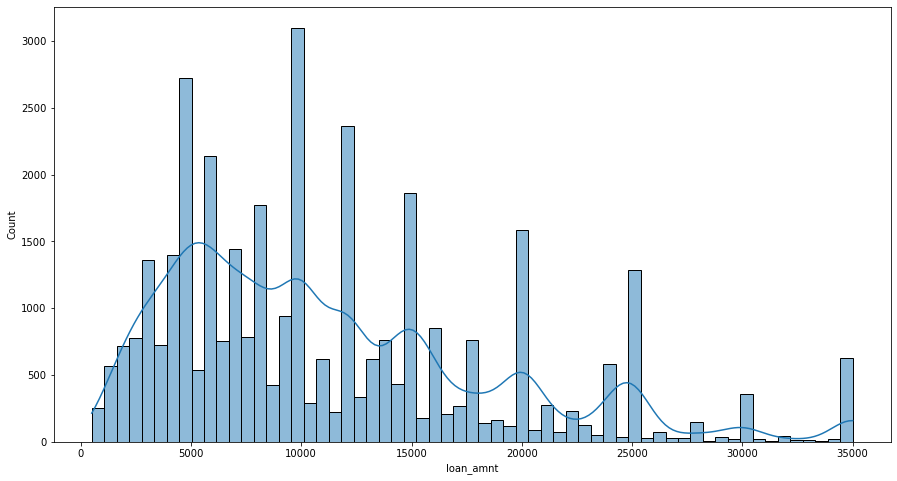

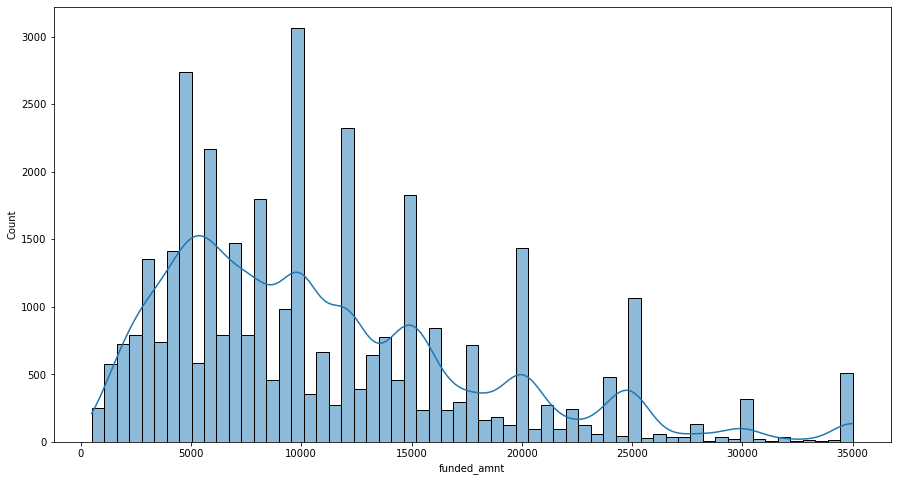

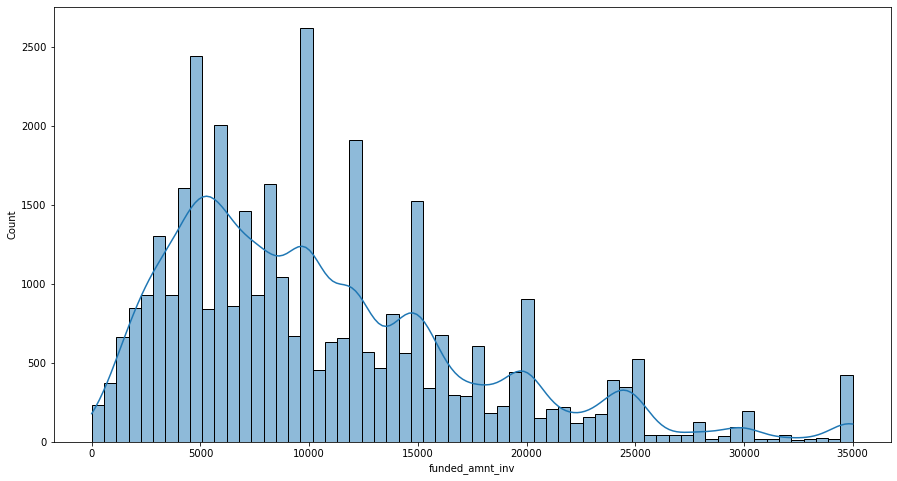

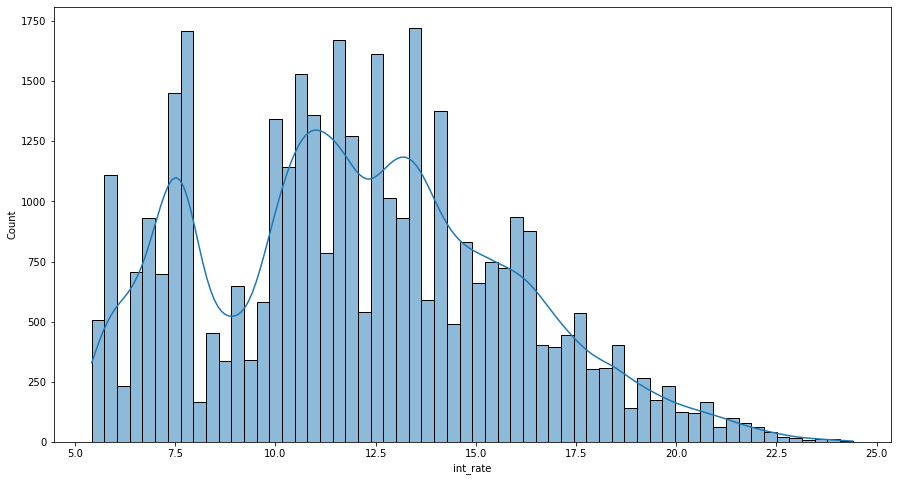

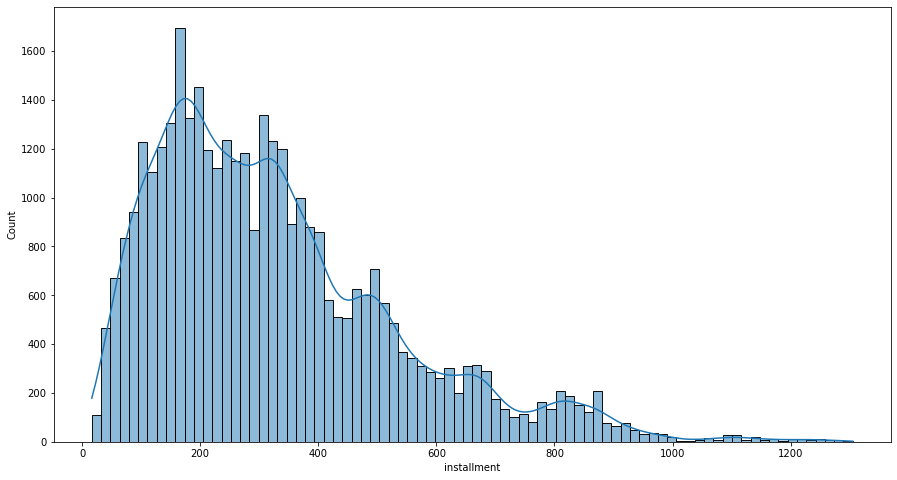

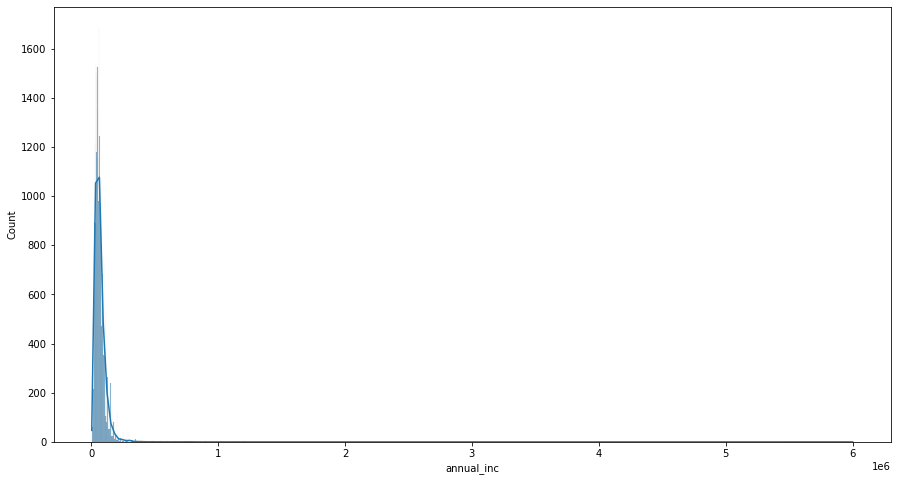

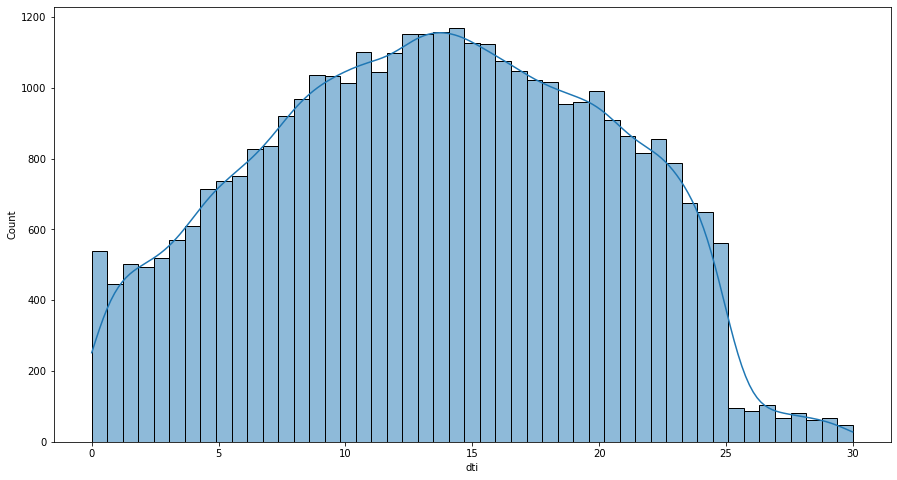

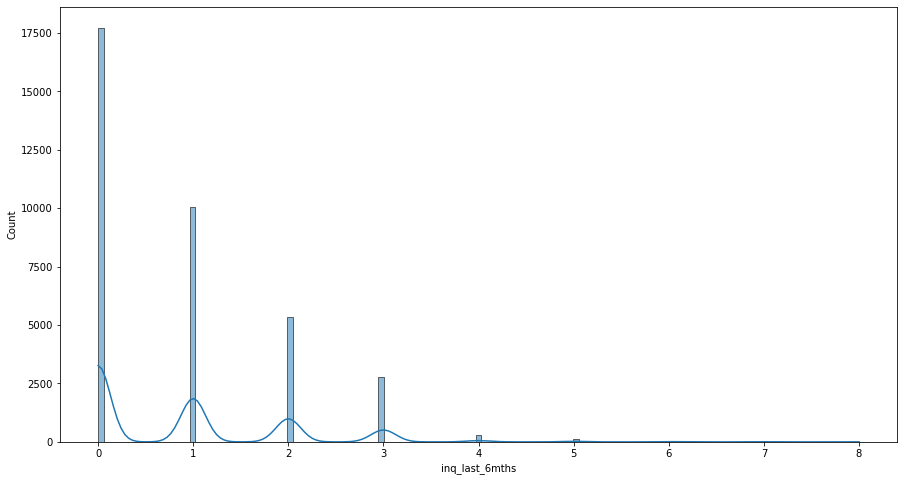

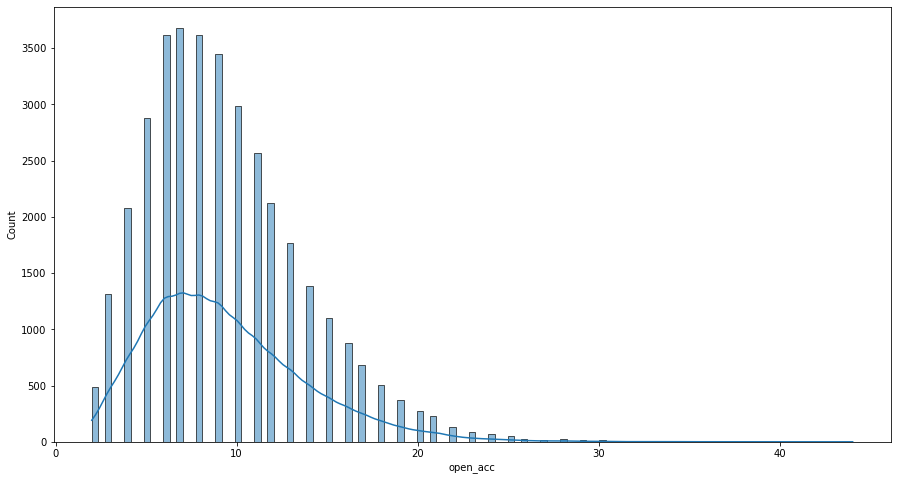

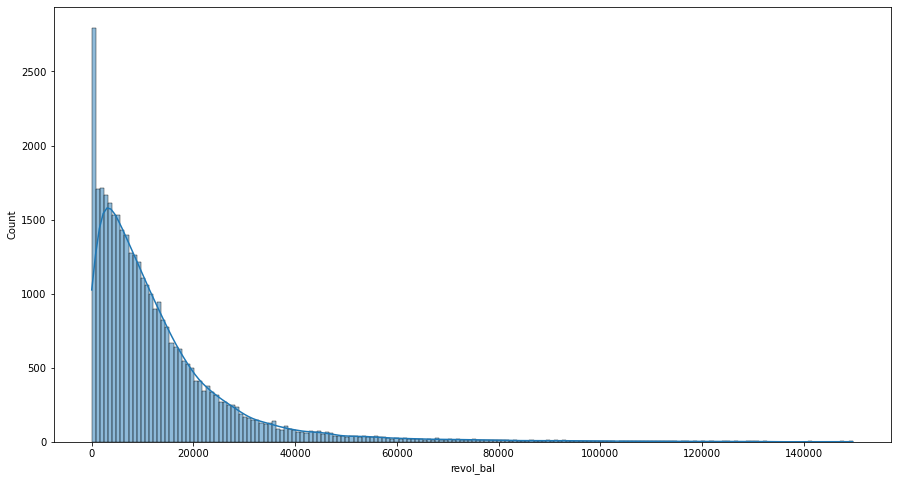

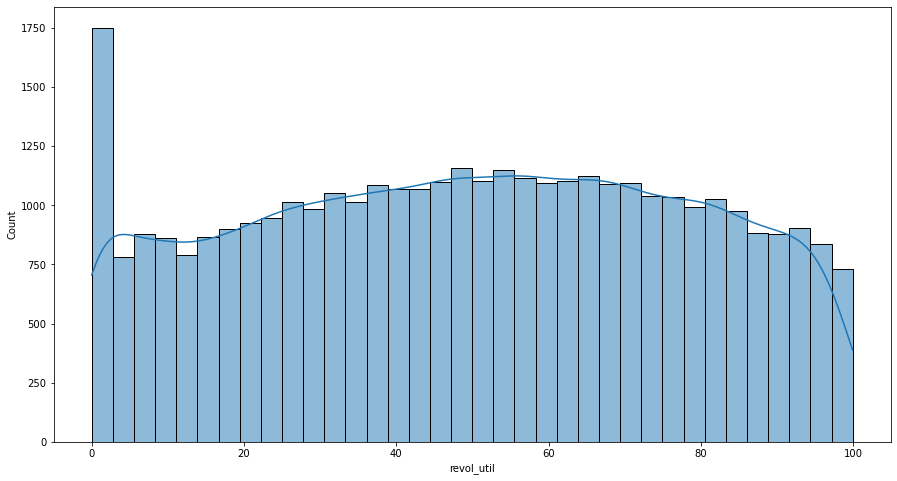

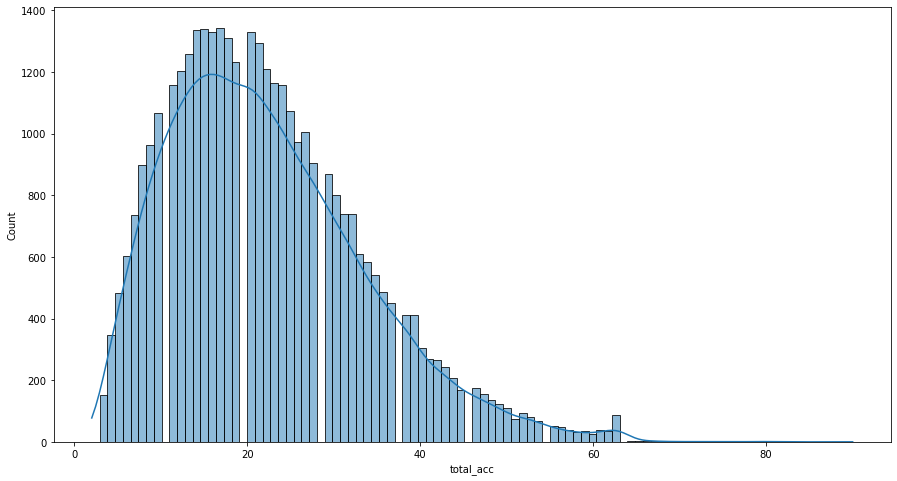

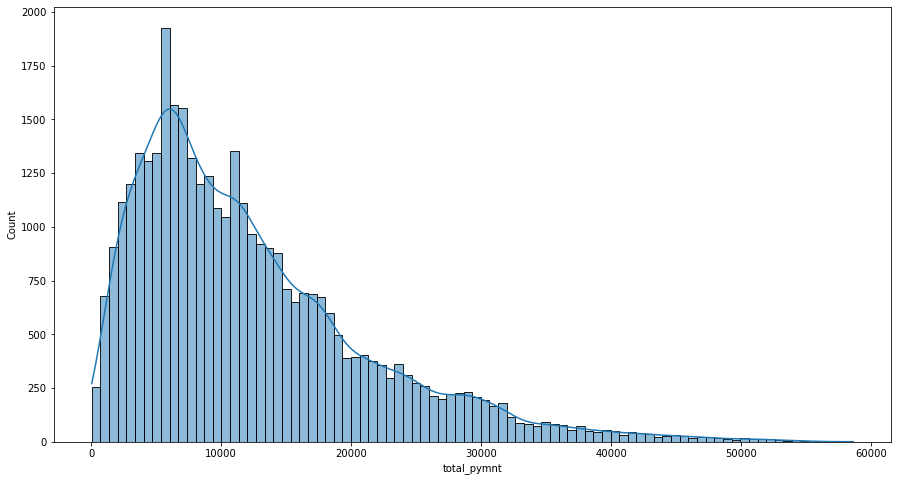

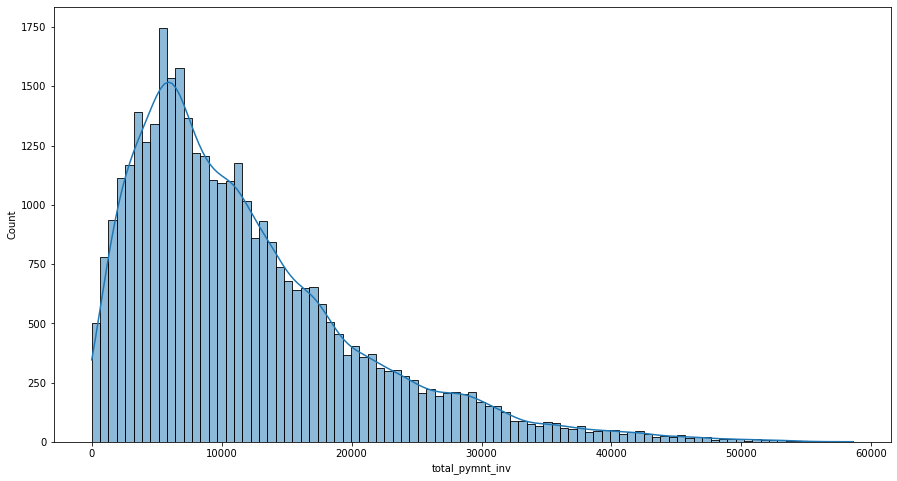

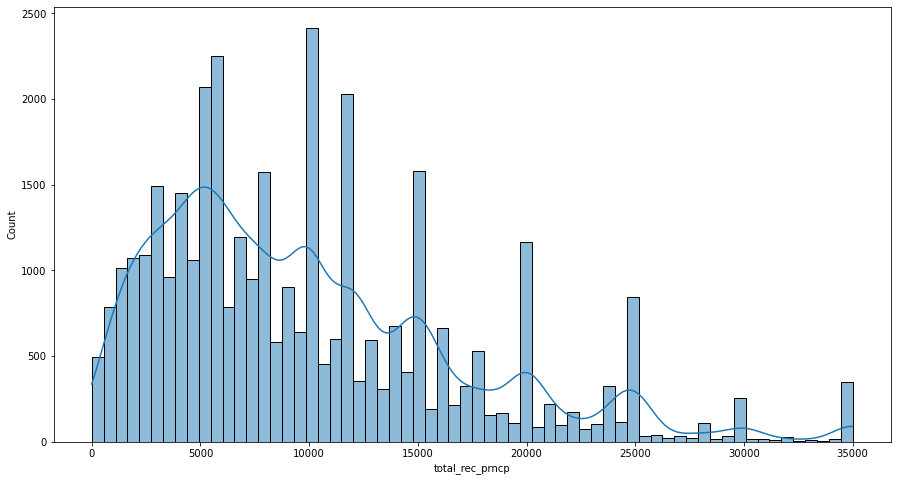

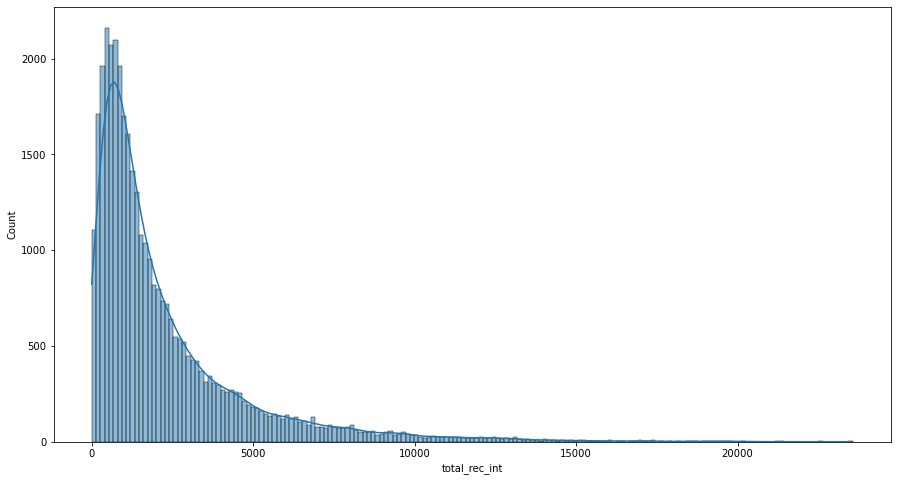

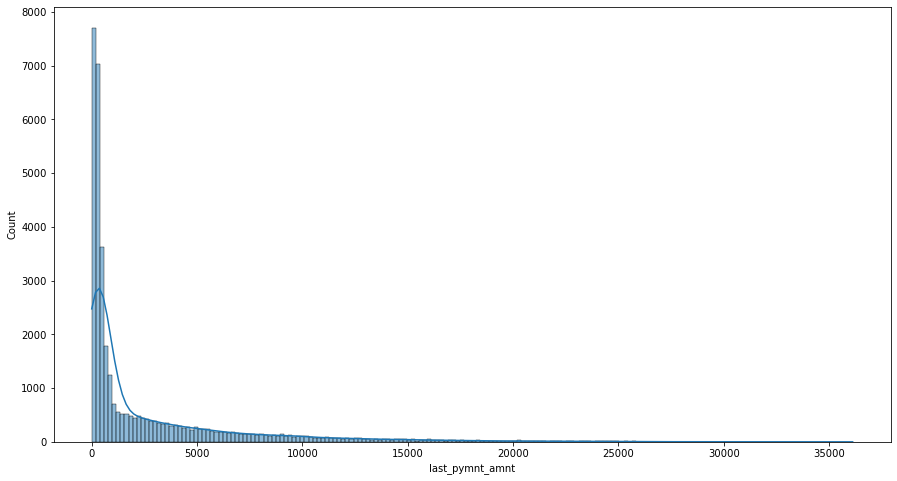

In [84]:
for i in num_cols:
    sns.histplot(df[i],kde=True)
    plt.show()

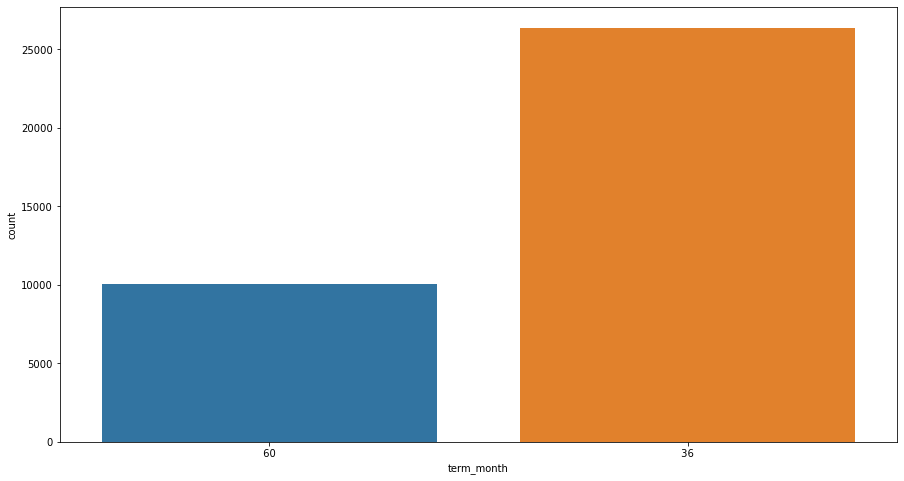

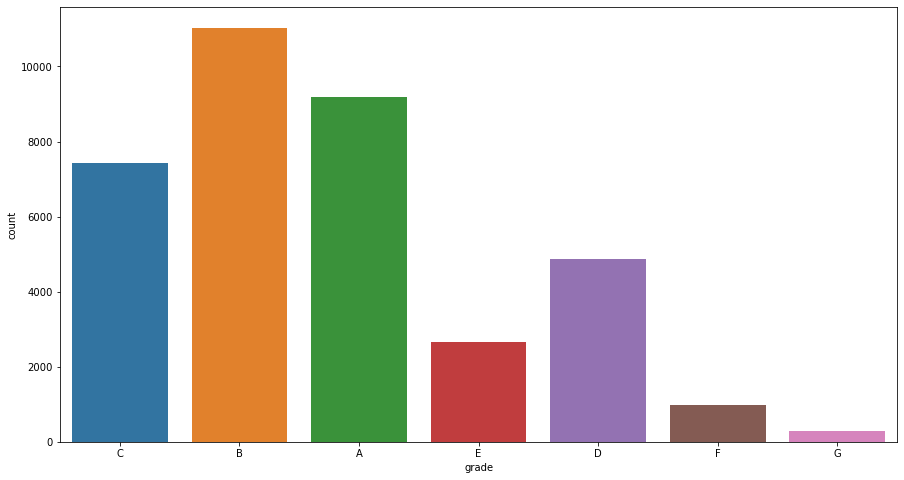

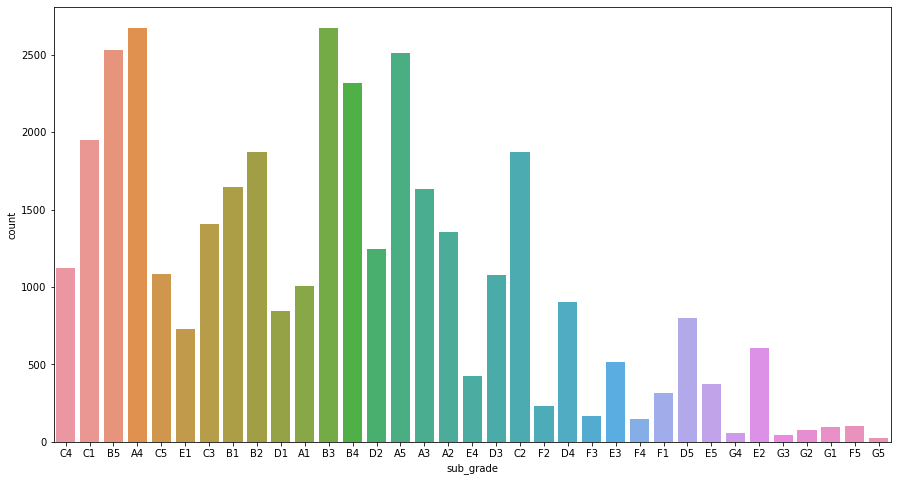

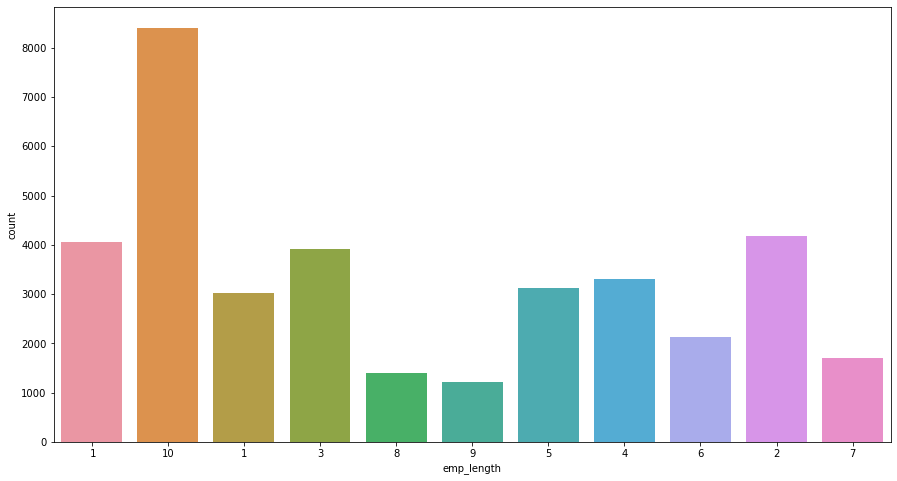

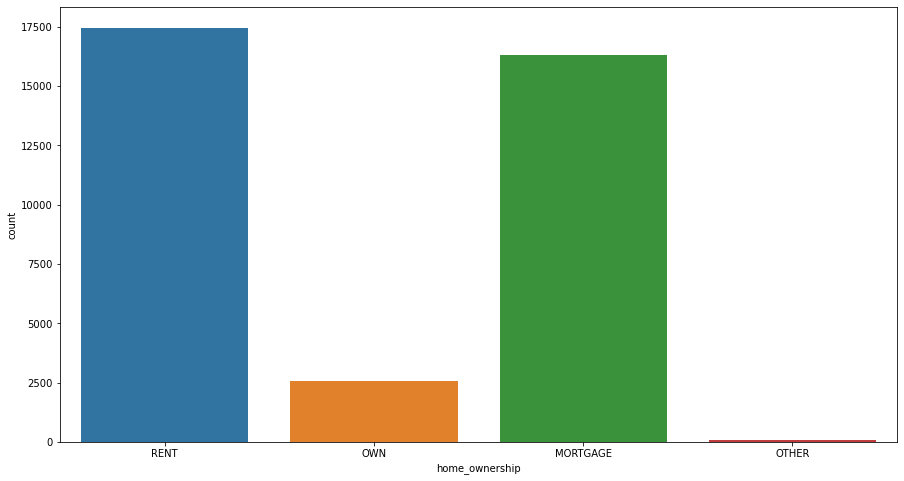

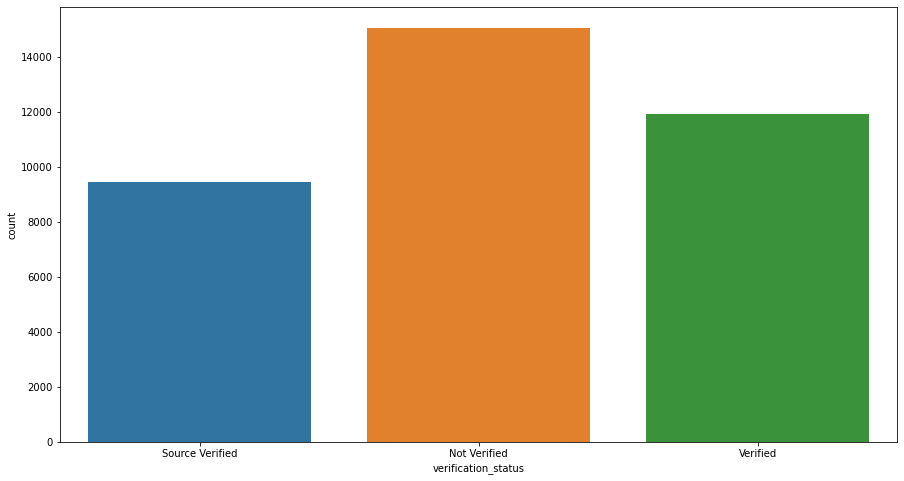

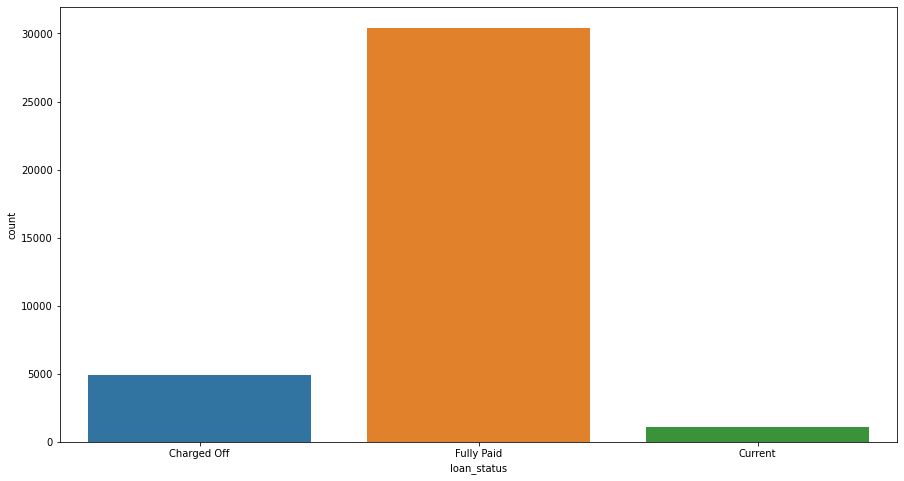

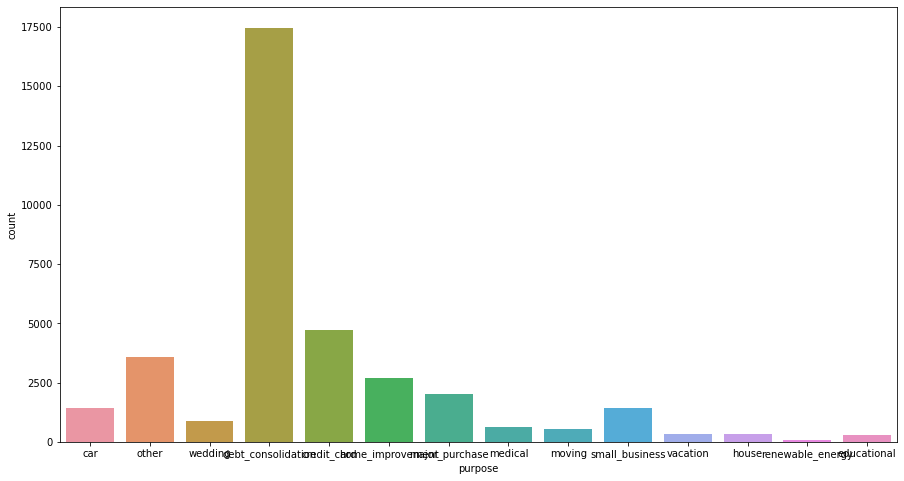

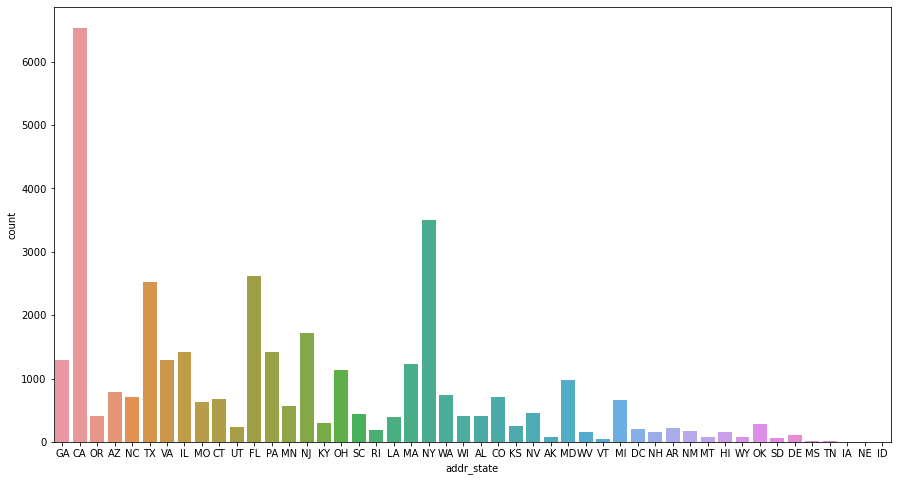

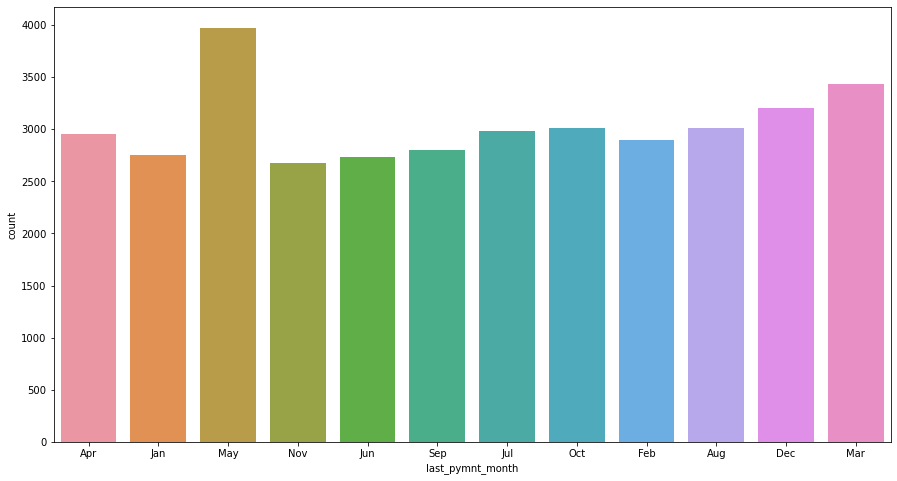

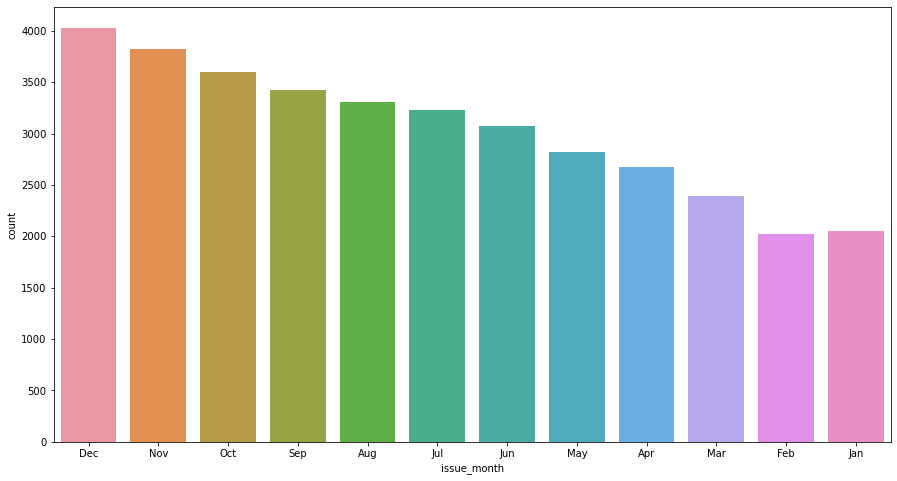

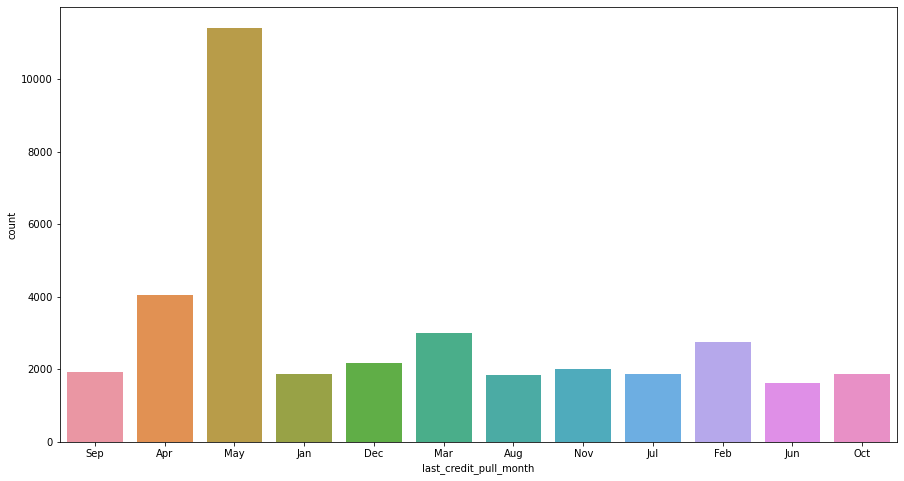

In [85]:
for i in cat_cols:
    sns.countplot(df[i])
    plt.show()

# Bivariate Analysis Of Categorical 

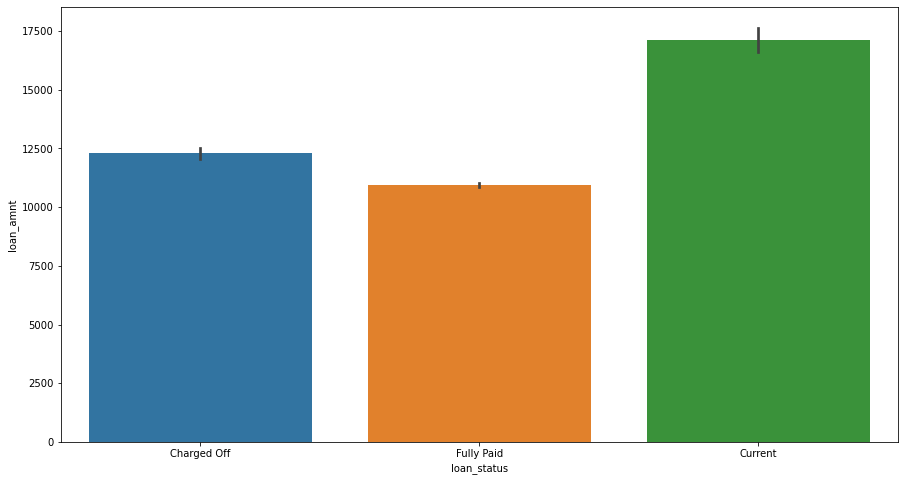

In [86]:
sns.barplot(df['loan_status'],df['loan_amnt'])
plt.show()

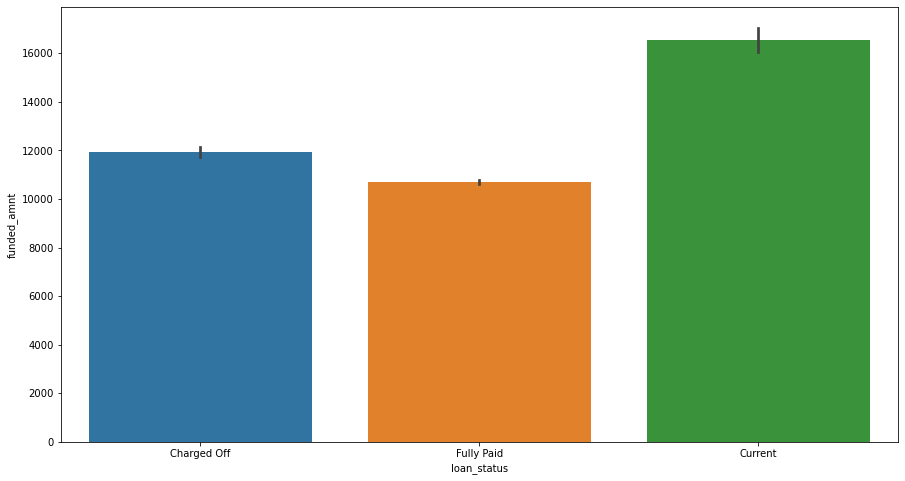

In [87]:
sns.barplot(df['loan_status'],df['funded_amnt'])
plt.show()

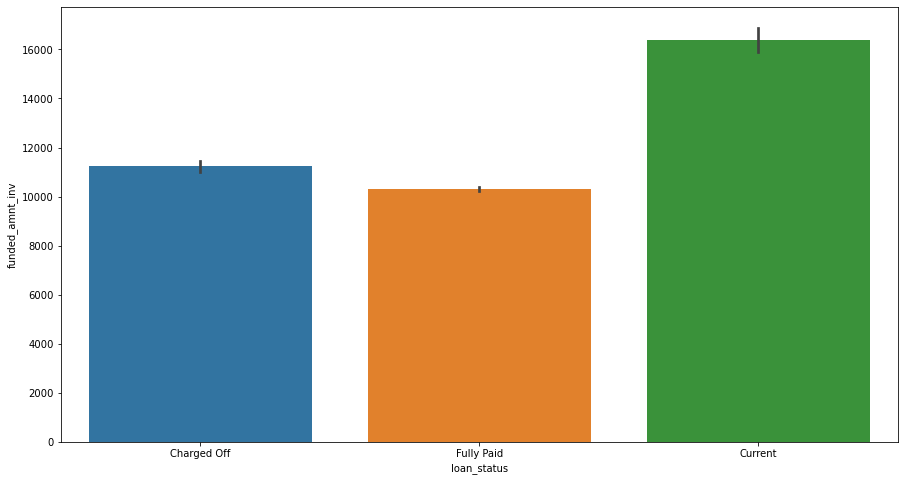

In [88]:
sns.barplot(df['loan_status'],df['funded_amnt_inv'])
plt.show()

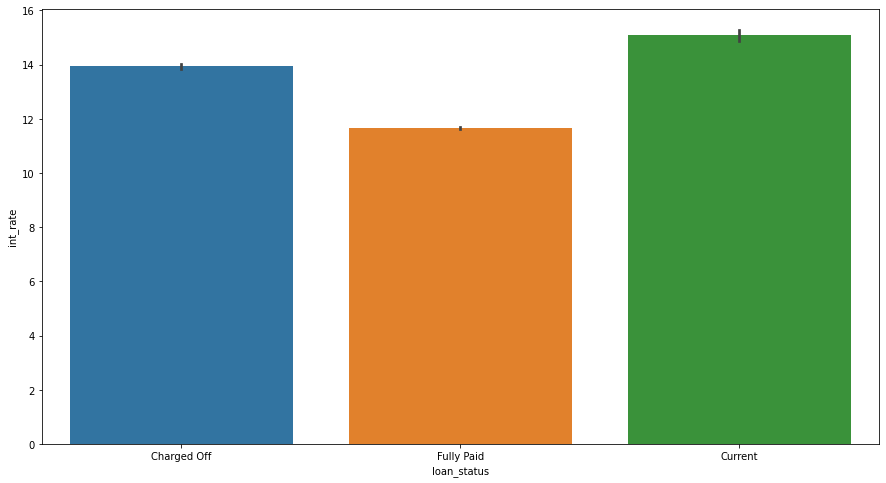

In [89]:
sns.barplot(df['loan_status'],df['int_rate'])
plt.show()

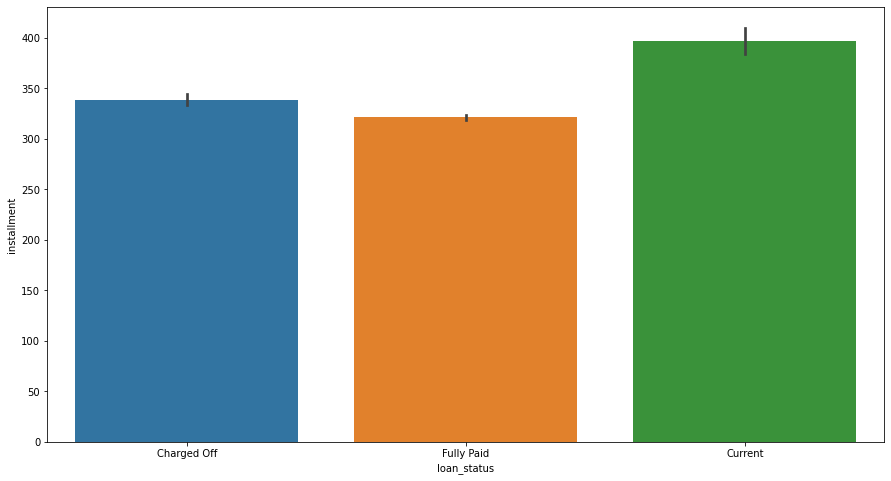

In [90]:
sns.barplot(df['loan_status'],df['installment'])
plt.show()

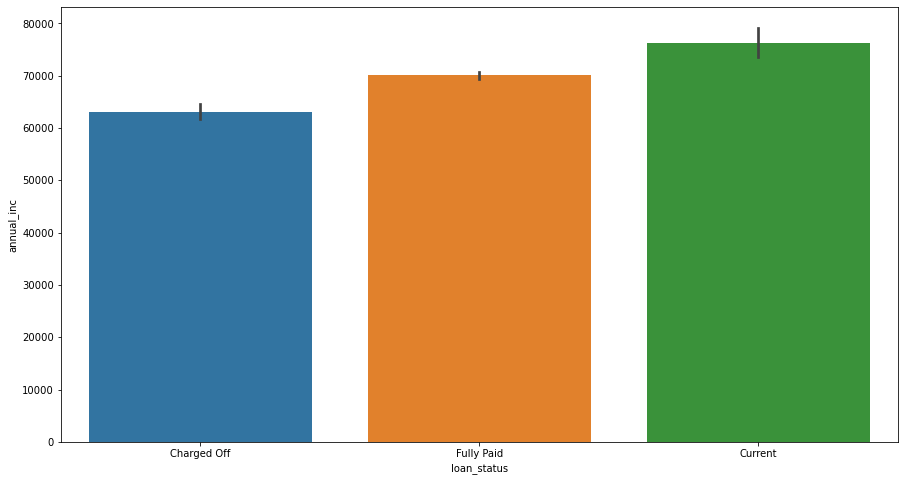

In [91]:
sns.barplot(df['loan_status'],df['annual_inc'])
plt.show()

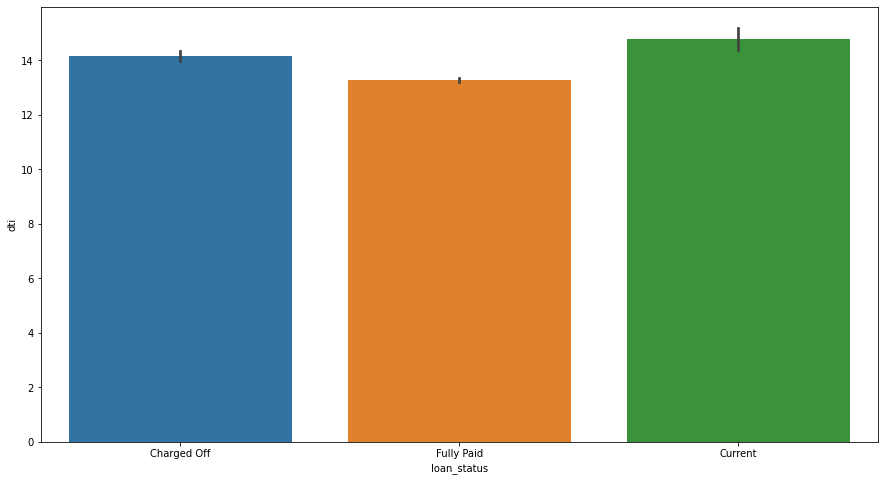

In [92]:
sns.barplot(df['loan_status'],df['dti'])
plt.show()

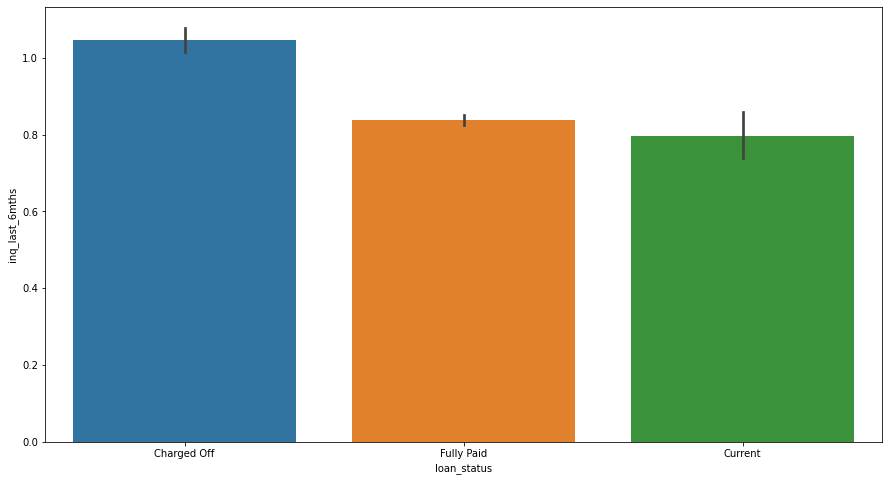

In [93]:
sns.barplot(df['loan_status'],df['inq_last_6mths'])
plt.show()

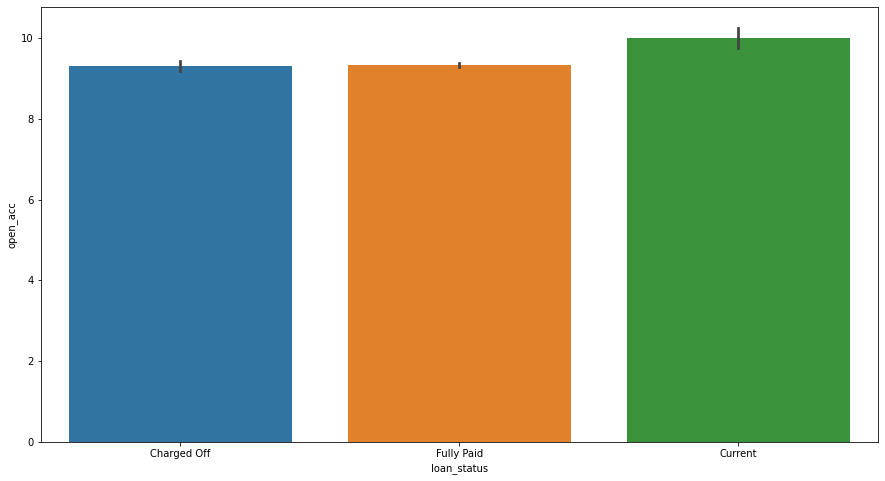

In [94]:
sns.barplot(df['loan_status'],df['open_acc'])
plt.show()

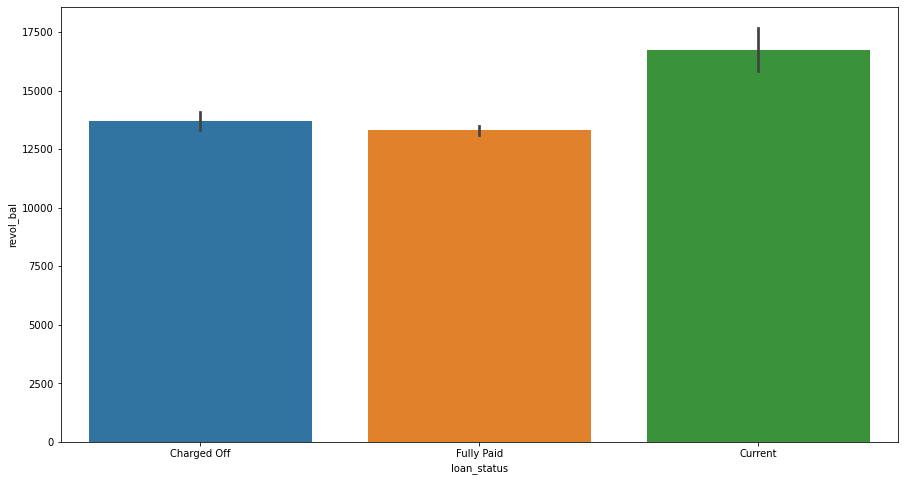

In [95]:
sns.barplot(df['loan_status'],df['revol_bal'])
plt.show()

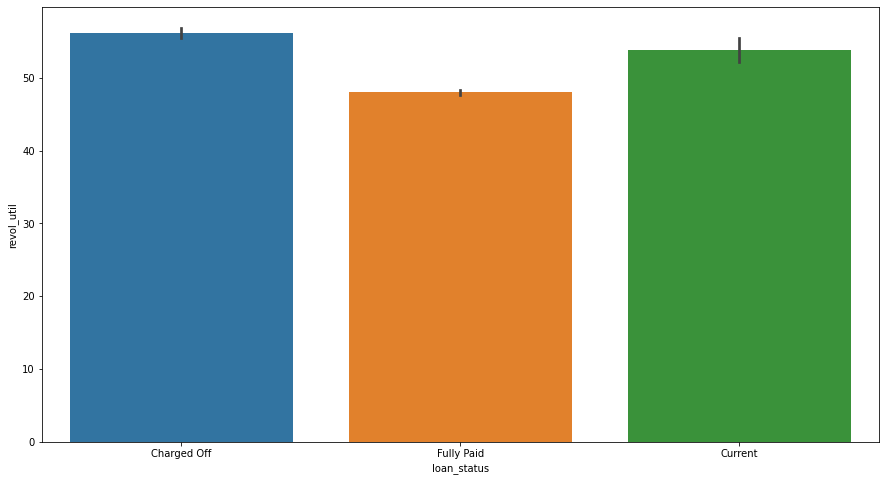

In [96]:
sns.barplot(df['loan_status'],df['revol_util'])
plt.show()

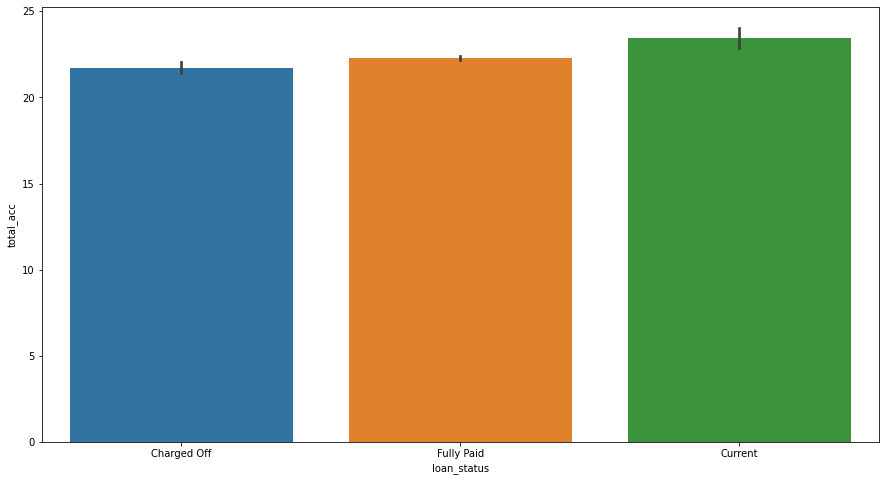

In [97]:
sns.barplot(df['loan_status'],df['total_acc'])
plt.show()

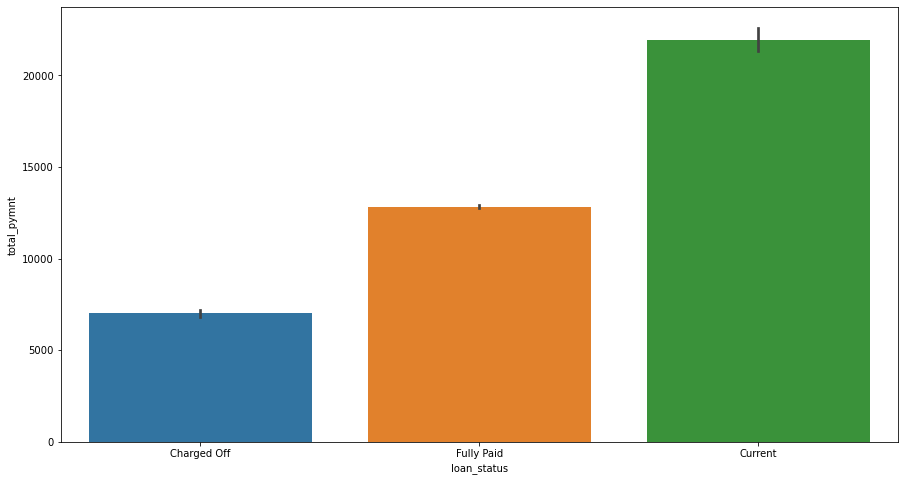

In [98]:
sns.barplot(df['loan_status'],df['total_pymnt'])
plt.show()

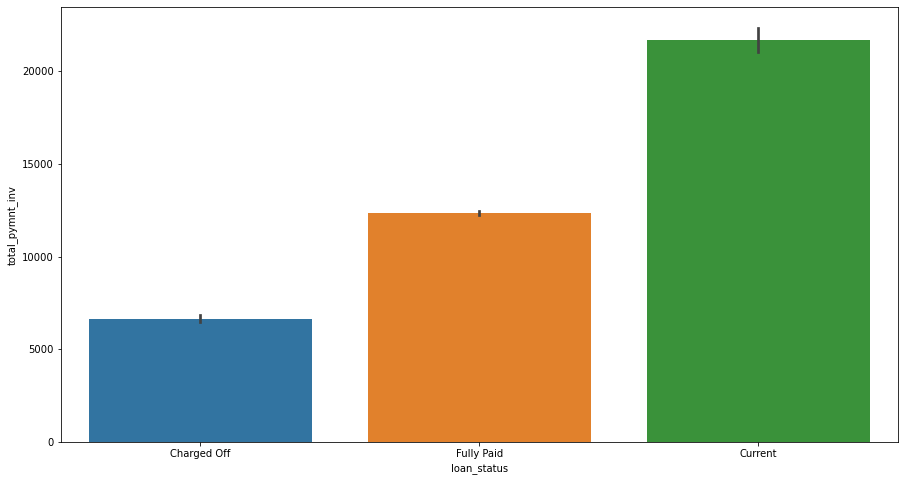

In [99]:
sns.barplot(df['loan_status'],df['total_pymnt_inv'])
plt.show()

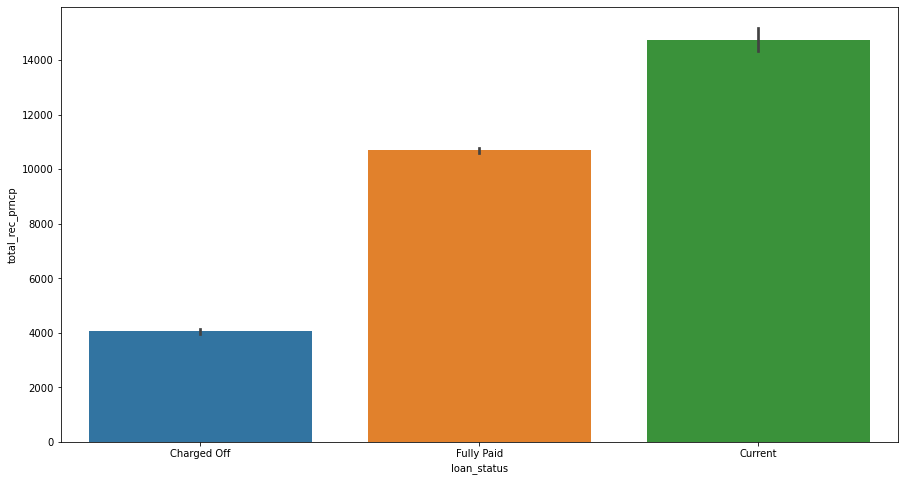

In [100]:
sns.barplot(df['loan_status'],df['total_rec_prncp'])
plt.show()

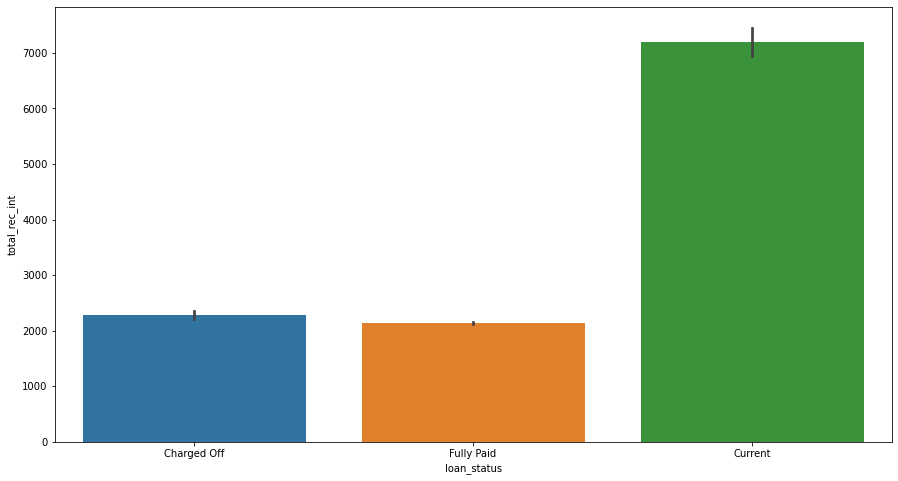

In [101]:
sns.barplot(df['loan_status'],df['total_rec_int'])
plt.show()

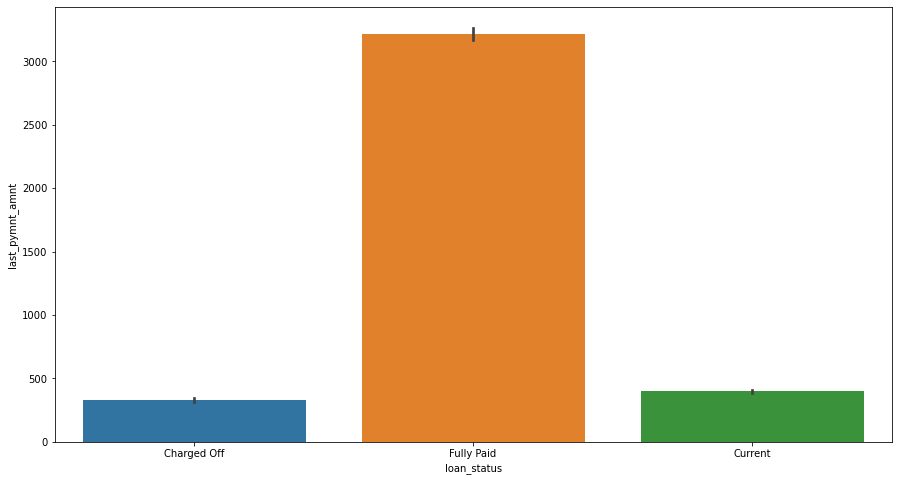

In [102]:
sns.barplot(df['loan_status'],df['last_pymnt_amnt'])
plt.show()

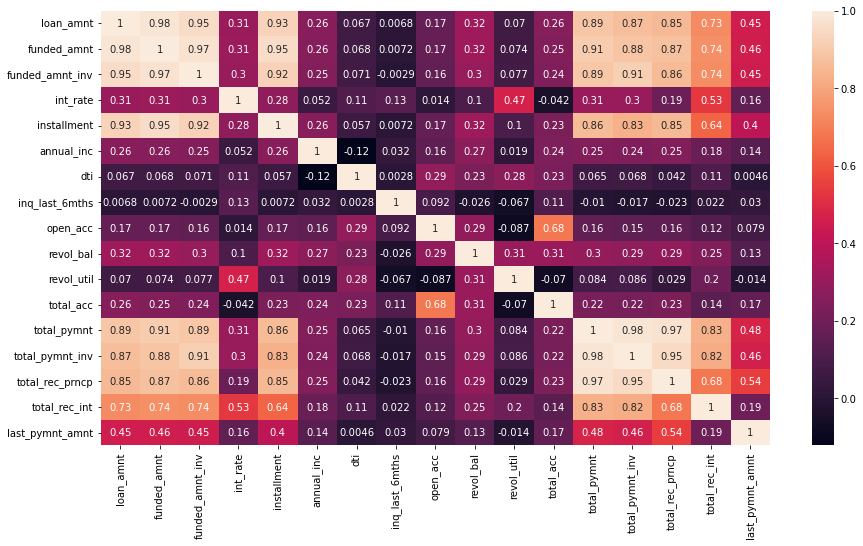

In [103]:
sns.heatmap(df.corr(),annot=True)
plt.show()

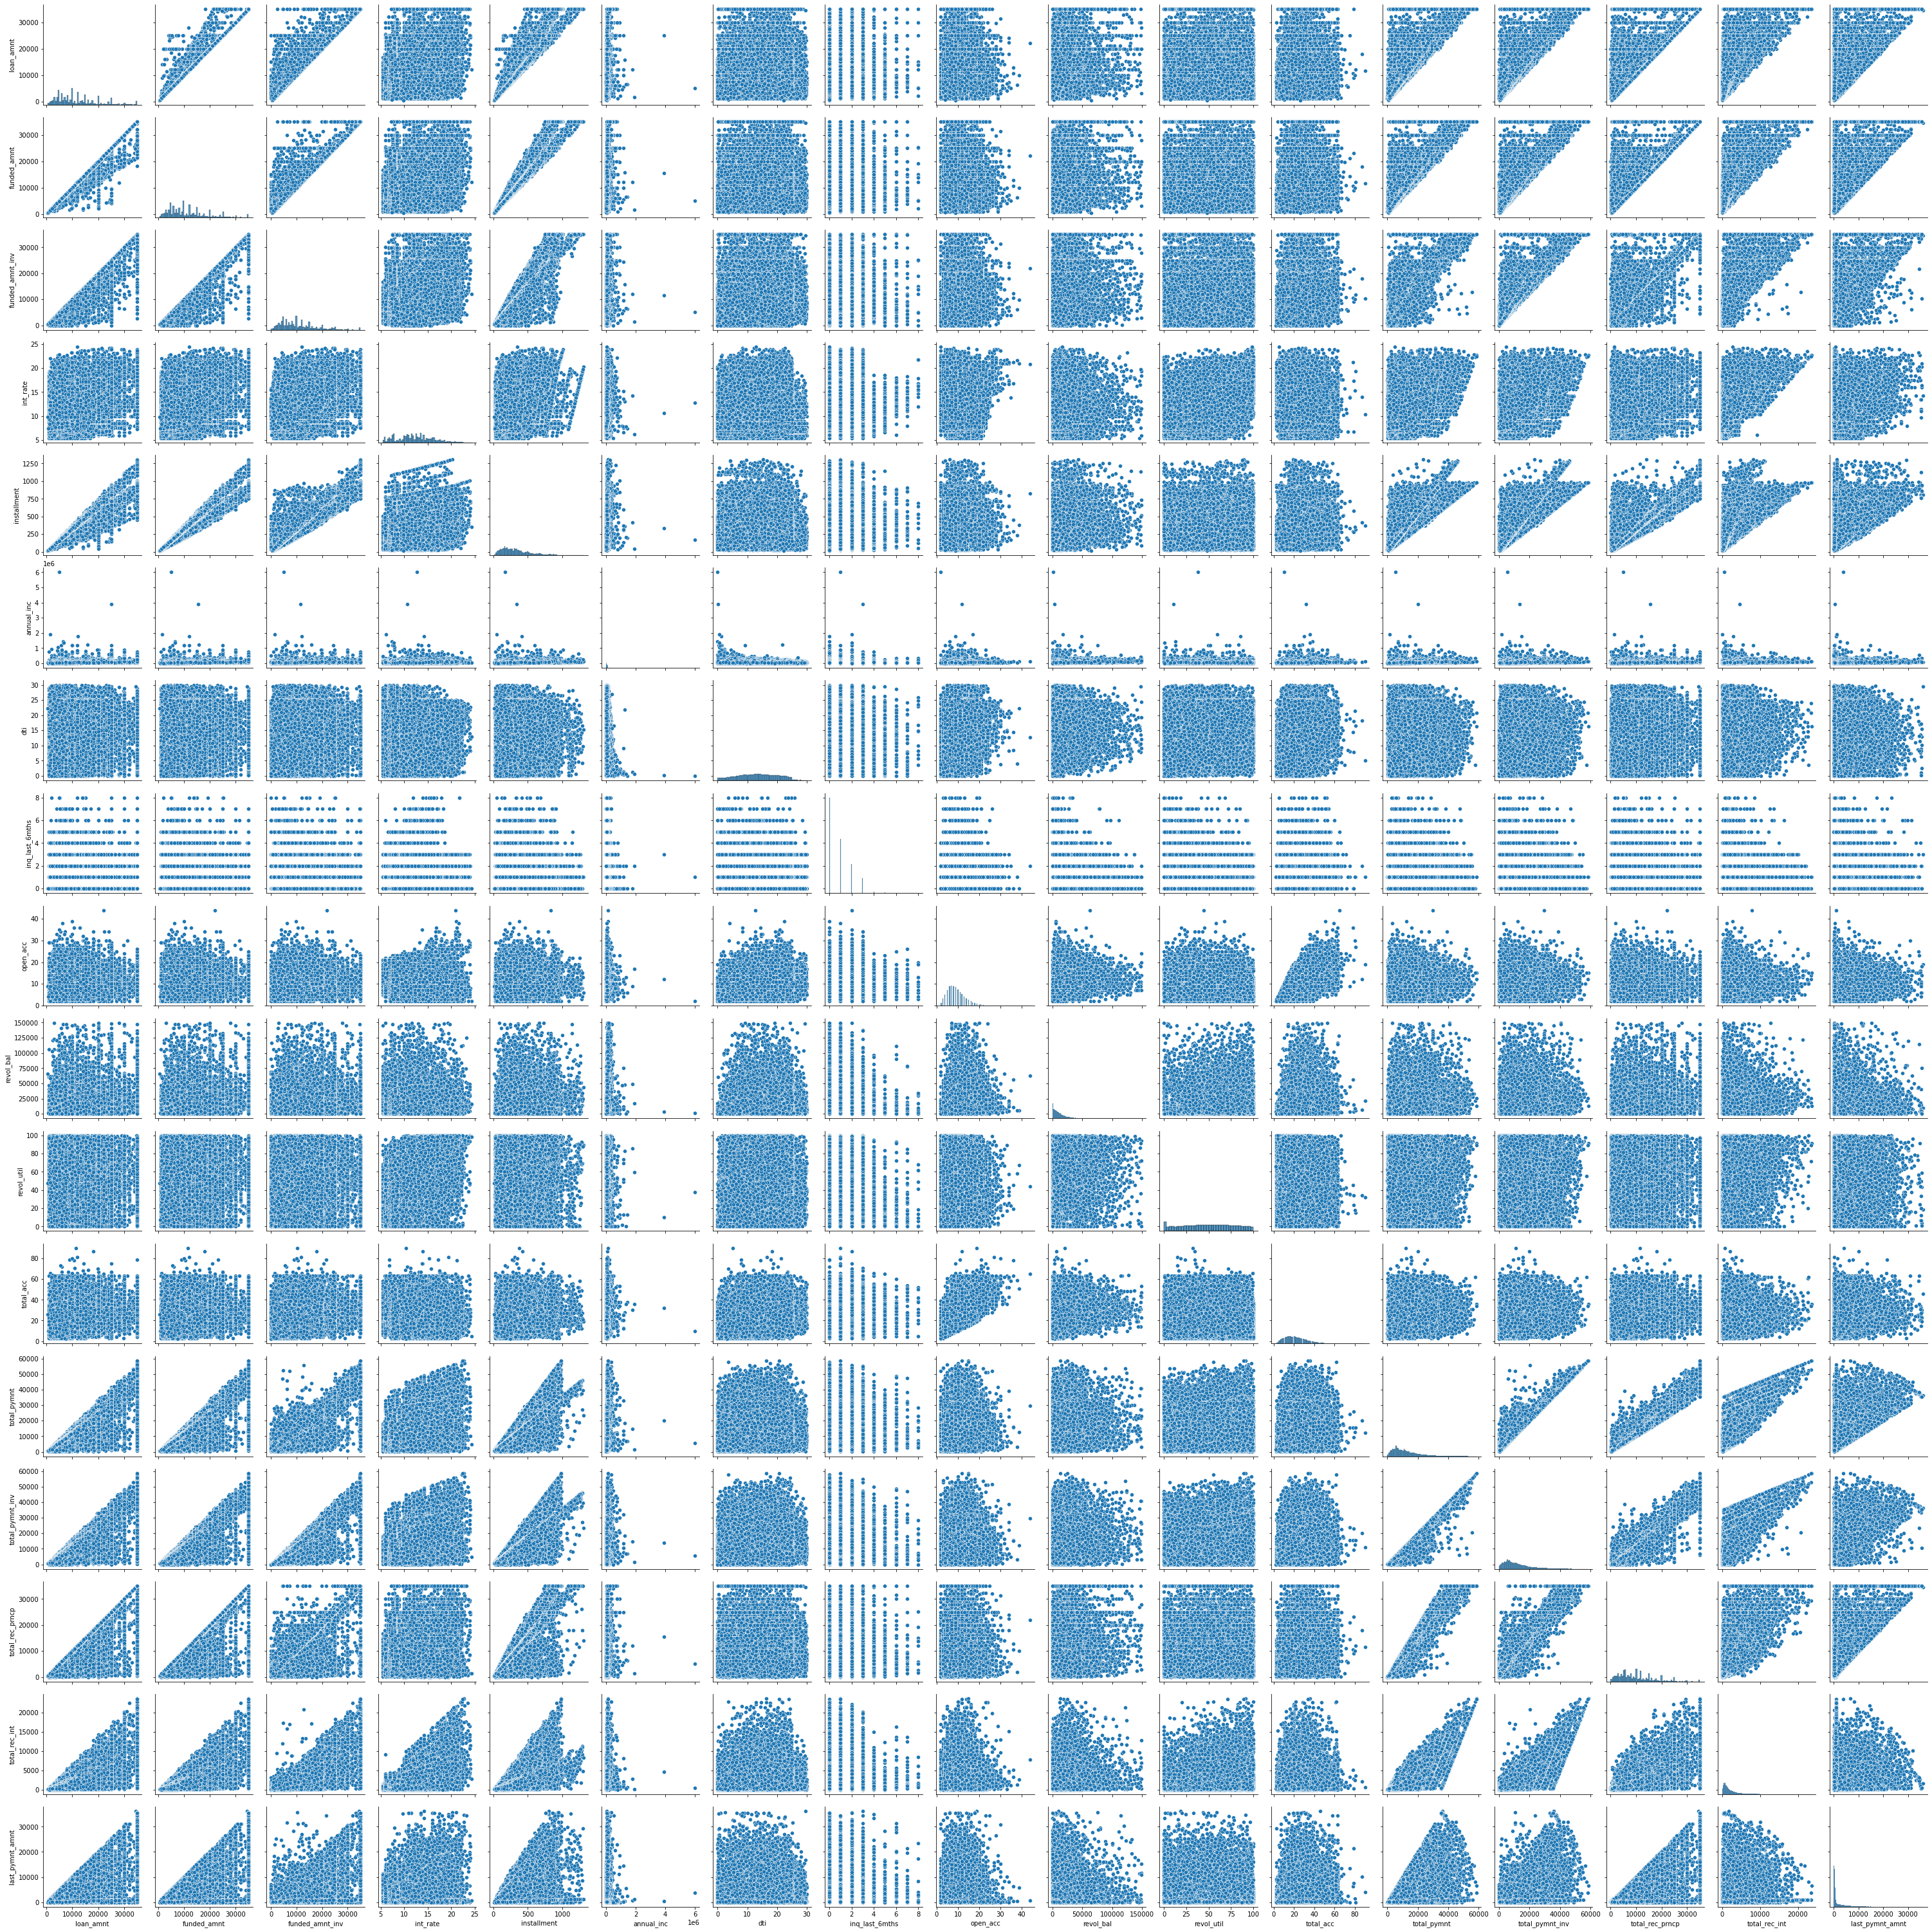

In [104]:
sns.pairplot(df)
plt.show()

In [105]:
df.head()

loan_amnt  funded_amnt  funded_amnt_inv term_month  int_rate  installment  \
1       2500         2500           2500.0        60      15.27        59.83   
3      10000        10000          10000.0        36      13.49       339.31   
4       3000         3000           3000.0        60      12.69        67.79   
5       5000         5000           5000.0        36       7.90       156.46   
6       7000         7000           7000.0        60      15.96       170.08   

  grade sub_grade emp_length home_ownership  annual_inc verification_status  \
1     C        C4          1           RENT     30000.0     Source Verified   
3     C        C1         10           RENT     49200.0     Source Verified   
4     B        B5          1           RENT     80000.0     Source Verified   
5     A        A4          3           RENT     36000.0     Source Verified   
6     C        C5          8           RENT     47004.0        Not Verified   

   loan_status             purpose addr_state    dti  inq_last_6mths  \
1  Charged Off                 car         GA   1.00               5   
3   Fully Paid               other         CA  20.00               1   
4      Current               other         OR  17.94               0   
5   Fully Paid             wedding         AZ  11.20               3   
6   Fully Paid  debt_consolidation         NC  23.51               1   

   open_acc  revol_bal  revol_util  total_acc  total_pymnt  total_pymnt_inv  \
1         3       1687         9.4          4      1008.71          1008.71   
3        10       5598        21.0         37     12231.89         12231.89   
4        15      27783        53.9         38      3513.33          3513.33   
5         9       7963        28.3         12      5632.21          5632.21   
6         7      17726        85.6         11     10110.84         10110.84   

   total_rec_prncp  total_rec_int  last_pymnt_amnt last_pymnt_month  \
1           456.46         435.17           119.66              Apr   
3         10000.00        2214.92           357.48              Jan   
4          2475.94        1037.39            67.79              May   
5          5000.00         632.21           161.03              Jan   
6          6985.61        3125.23          1313.76              May   

  issue_month last_credit_pull_month  
1         Dec                    Sep  
3         Dec                    Apr  
4         Dec                    May  
5         Dec                    Jan  
6         Dec                    May

# LabelEncoder

In [106]:
le = LabelEncoder()

In [107]:
df['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [108]:
df['home_ownership'] = le.fit_transform(df['home_ownership'])

In [109]:
df['grade'].unique()

array(['C', 'B', 'A', 'E', 'D', 'F', 'G'], dtype=object)

In [110]:
grade = {"A":0,"B":1,"C":2,"D":3,"E":4,"F":5,"G":6}

In [111]:
df['grade'] = df['grade'].map(grade)

In [130]:
df['sub_grade'].unique()

array(['C4', 'C1', 'B5', 'A4', 'C5', 'E1', 'C3', 'B1', 'B2', 'D1', 'A1',
       'B3', 'B4', 'D2', 'A5', 'A3', 'A2', 'E4', 'D3', 'C2', 'F2', 'D4',
       'F3', 'E3', 'F4', 'F1', 'D5', 'E5', 'G4', 'E2', 'G3', 'G2', 'G1',
       'F5', 'G5'], dtype=object)

In [131]:
df.drop('sub_grade',axis=1,inplace=True)

In [112]:
df['verification_status'].unique()

array(['Source Verified', 'Not Verified', 'Verified'], dtype=object)

In [113]:
df['verification_status'] = le.fit_transform(df['verification_status'])

In [114]:
df['loan_status'].unique()

array(['Charged Off', 'Fully Paid', 'Current'], dtype=object)

In [115]:
df['loan_status'] = le.fit_transform(df['loan_status'])

In [116]:
df['purpose'].unique()

array(['car', 'other', 'wedding', 'debt_consolidation', 'credit_card',
       'home_improvement', 'major_purchase', 'medical', 'moving',
       'small_business', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [117]:
df['purpose'] = le.fit_transform(df['purpose'])

In [118]:
df['addr_state'].unique()

array(['GA', 'CA', 'OR', 'AZ', 'NC', 'TX', 'VA', 'IL', 'MO', 'CT', 'UT',
       'FL', 'PA', 'MN', 'NJ', 'KY', 'OH', 'SC', 'RI', 'LA', 'MA', 'NY',
       'WA', 'WI', 'AL', 'CO', 'KS', 'NV', 'AK', 'MD', 'WV', 'VT', 'MI',
       'DC', 'NH', 'AR', 'NM', 'MT', 'HI', 'WY', 'OK', 'SD', 'DE', 'MS',
       'TN', 'IA', 'NE', 'ID'], dtype=object)

In [119]:
df.drop('addr_state',axis=1,inplace=True)

In [120]:
month = {'Jan':1,"Feb":2,"Mar":3,"Apr":4,"May":5,"Jun":6,"Jul":7,"Aug":8,"Sep":9,"Oct":10,"Nov":11,"Dec":12}

In [121]:
df['last_pymnt_month'] = df['last_pymnt_month'].map(month)

In [122]:
df['issue_month'] = df['issue_month'].map(month)

In [123]:
df['last_credit_pull_month'] = df['last_credit_pull_month'].map(month)

In [124]:
df['dti'].unique()

array([ 1.  , 20.  , 17.94, ...,  0.05,  0.12, 25.43])

# Modeling

In [132]:
X = df.drop('loan_status',axis=1)
y = df['loan_status']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=123)
print("Training :- ",X_train.shape,y_train.shape)
print("Testing :- ",X_test.shape,y_test.shape)

Training :-  (29144, 26) (29144,)
Testing :-  (7287, 26) (7287,)


In [133]:
sc=StandardScaler()

In [134]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [135]:
X_train

array([[-0.98369232, -0.98167804, -0.93350142, ..., -0.42887291,
        -1.55624017,  1.05419782],
       [-0.8490358 , -0.84205377, -0.79192552, ...,  0.74221977,
         1.42452755,  1.38662812],
       [-1.23953969, -1.24696415, -1.20249562, ...,  0.74221977,
         0.23222046,  1.05419782],
       ...,
       [ 0.49752935,  0.55418891,  0.61360762, ..., -1.59996559,
        -1.55624017, -1.27281432],
       [ 0.0935598 ,  0.1353161 ,  0.19202695, ..., -0.42887291,
        -0.66200986, -0.2755234 ],
       [-0.24308148, -0.21374457, -0.154834  , ..., -0.42887291,
        -0.96008663, -0.2755234 ]])

In [140]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,classification_report,precision_recall_curve,roc_curve,roc_auc_score 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [141]:
def my_model(model):
    model.fit(X_train,y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    print('TrianData')
    print(classification_report(y_train,y_pred_train))
    print("Test Data")
    print(classification_report(y_test,y_pred_test))
    return model

In [142]:
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

In [143]:
my_model(dt)

TrianData
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3964
           1       1.00      1.00      1.00       857
           2       1.00      1.00      1.00     24323

    accuracy                           1.00     29144
   macro avg       1.00      1.00      1.00     29144
weighted avg       1.00      1.00      1.00     29144

Test Data
              precision    recall  f1-score   support

           0       0.81      0.96      0.88       978
           1       0.91      0.91      0.91       209
           2       0.99      0.96      0.98      6100

    accuracy                           0.96      7287
   macro avg       0.90      0.95      0.92      7287
weighted avg       0.96      0.96      0.96      7287



DecisionTreeClassifier()

In [144]:
my_model(rf)

TrianData
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3964
           1       1.00      1.00      1.00       857
           2       1.00      1.00      1.00     24323

    accuracy                           1.00     29144
   macro avg       1.00      1.00      1.00     29144
weighted avg       1.00      1.00      1.00     29144

Test Data
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       978
           1       0.97      0.93      0.95       209
           2       0.99      1.00      0.99      6100

    accuracy                           0.99      7287
   macro avg       0.98      0.96      0.97      7287
weighted avg       0.99      0.99      0.99      7287



RandomForestClassifier()